# Prediction_of_power_consumption_PJT

## 1. Data loading

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
!ls
!ls ./energy

Untitled.ipynb energy
sample_submission.csv test.csv              train.csv


In [19]:
base_path = "./energy/"

In [20]:
train = pd.read_csv(base_path + "train.csv", encoding='cp949')
test = pd.read_csv(base_path + "test.csv", encoding='cp949')

In [21]:
train

num      date_time  전력사용량(kWh)  기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  \
0         1  2020-06-01 00    8179.056    17.6      2.5   92.0      0.8   
1         1  2020-06-01 01    8135.640    17.7      2.9   91.0      0.3   
2         1  2020-06-01 02    8107.128    17.5      3.2   91.0      0.0   
3         1  2020-06-01 03    8048.808    17.1      3.2   91.0      0.0   
4         1  2020-06-01 04    8043.624    17.0      3.3   92.0      0.0   
...     ...            ...         ...     ...      ...    ...      ...   
122395   60  2020-08-24 19    4114.368    27.8      2.3   68.0      0.0   
122396   60  2020-08-24 20    3975.696    27.3      1.2   71.0      0.0   
122397   60  2020-08-24 21    3572.208    27.3      1.8   71.0      0.0   
122398   60  2020-08-24 22    3299.184    27.1      1.8   74.0      0.0   
122399   60  2020-08-24 23    3204.576    27.1      2.6   75.0      0.0   

        일조(hr)  비전기냉방설비운영  태양광보유  
0          0.0        0.0    0.0  
1          0.0        0.0    0.0  
2          0.0        0.0    0.0  
3          0.0        0.0    0.0  
4          0.0        0.0    0.0  
...        ...        ...    ...  
122395     0.7        1.0    1.0  
122396     0.0        1.0    1.0  
122397     0.0        1.0    1.0  
122398     0.0        1.0    1.0  
122399     0.0        1.0    1.0  

[122400 rows x 10 columns]

In [22]:
test

num      date_time  기온(°C)  풍속(m/s)  습도(%)  강수량(mm, 6시간)  일조(hr, 3시간)  \
0        1  2020-08-25 00    27.8      1.5   74.0           0.0          0.0   
1        1  2020-08-25 01     NaN      NaN    NaN           NaN          NaN   
2        1  2020-08-25 02     NaN      NaN    NaN           NaN          NaN   
3        1  2020-08-25 03    27.3      1.1   78.0           NaN          0.0   
4        1  2020-08-25 04     NaN      NaN    NaN           NaN          NaN   
...    ...            ...     ...      ...    ...           ...          ...   
10075   60  2020-08-31 19     NaN      NaN    NaN           NaN          NaN   
10076   60  2020-08-31 20     NaN      NaN    NaN           NaN          NaN   
10077   60  2020-08-31 21    27.9      4.1   68.0           NaN          0.0   
10078   60  2020-08-31 22     NaN      NaN    NaN           NaN          NaN   
10079   60  2020-08-31 23     NaN      NaN    NaN           NaN          NaN   

       비전기냉방설비운영  태양광보유  
0            NaN    NaN  
1            NaN    NaN  
2            NaN    NaN  
3            NaN    NaN  
4            NaN    NaN  
...          ...    ...  
10075        NaN    NaN  
10076        NaN    NaN  
10077        1.0    1.0  
10078        NaN    NaN  
10079        NaN    NaN  

[10080 rows x 9 columns]

## 2. Data Preprocessing with EDA

- 학습 기간: 2020-06-01 00 ~ 2020-08-24 23

- 예측 기간: 2020-08-25 00 ~ 2020-08-31 23 23


<<>>

- 학습 기간: 2022-10-01 00 ~ 2022-11-02 23

- 예측 기간: 2022-11-02 21 ~ 2022-11-07 23


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
 7   비전기냉방설비운영     2296 non-null   float64
 8   태양광보유         1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-pac

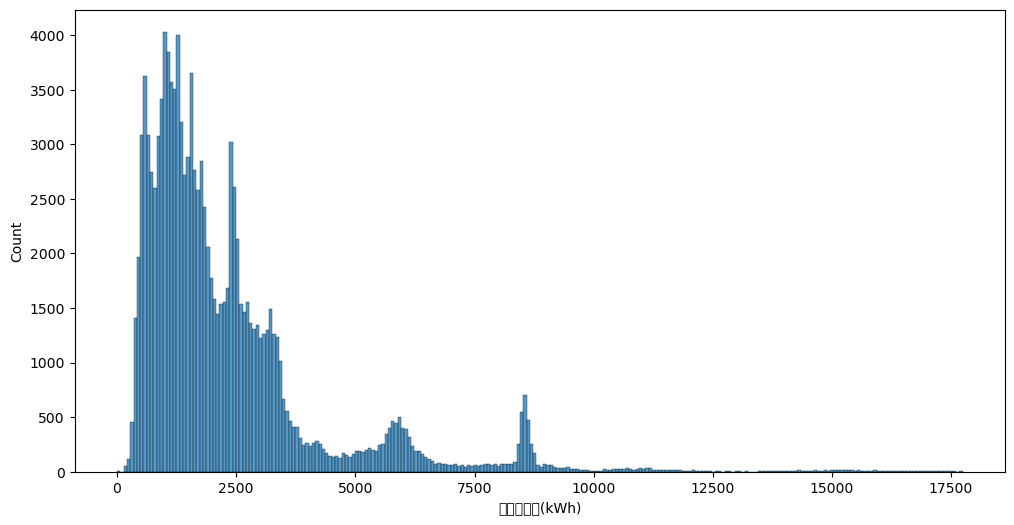

In [26]:
# 1. 결측치 확인
# 2. dtype이 object인 columns 확인
# 3. target distribution

plt.figure(figsize=(12, 6))
sns.histplot(data=train, x="전력사용량(kWh)")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-pac

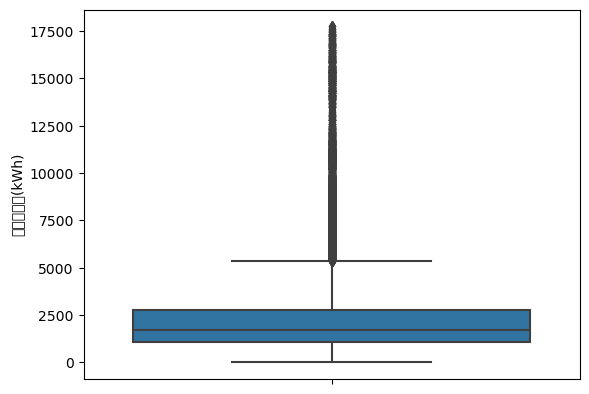

In [32]:
sns.boxplot(data=train, y="전력사용량(kWh)")
plt.show()

In [28]:
train[train["전력사용량(kWh)"] > 5500]

num      date_time  전력사용량(kWh)  기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  \
0         1  2020-06-01 00    8179.056    17.6      2.5   92.0      0.8   
1         1  2020-06-01 01    8135.640    17.7      2.9   91.0      0.3   
2         1  2020-06-01 02    8107.128    17.5      3.2   91.0      0.0   
3         1  2020-06-01 03    8048.808    17.1      3.2   91.0      0.0   
4         1  2020-06-01 04    8043.624    17.0      3.3   92.0      0.0   
...     ...            ...         ...     ...      ...    ...      ...   
110155   54  2020-08-24 19    7130.592    29.2      1.0   72.0      0.0   
110156   54  2020-08-24 20    6516.936    28.0      0.1   79.0      0.0   
110157   54  2020-08-24 21    6321.888    27.6      0.1   82.0      0.0   
110158   54  2020-08-24 22    6193.584    27.5      0.4   84.0      0.0   
110159   54  2020-08-24 23    6270.696    27.2      0.4   84.0      0.0   

        일조(hr)  비전기냉방설비운영  태양광보유  
0          0.0        0.0    0.0  
1          0.0        0.0    0.0  
2          0.0        0.0    0.0  
3          0.0        0.0    0.0  
4          0.0        0.0    0.0  
...        ...        ...    ...  
110155     0.6        1.0    0.0  
110156     0.0        1.0    0.0  
110157     0.0        1.0    0.0  
110158     0.0        1.0    0.0  
110159     0.0        1.0    0.0  

[10619 rows x 10 columns]

In [33]:
train[train["전력사용량(kWh)"] > 12500]

num      date_time   전력사용량(kWh)  기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  \
14294    8  2020-06-01 14  12991.52430    25.3      2.3   32.0      0.0   
14295    8  2020-06-01 15  12917.37060    25.4      2.8   33.0      0.0   
14296    8  2020-06-01 16  12809.80245    25.3      3.6   27.0      0.0   
14342    8  2020-06-03 14  13642.90380    26.6      1.4   50.0      0.0   
14343    8  2020-06-03 15  14143.04460    27.3      1.6   48.0      0.0   
...    ...            ...          ...     ...      ...    ...      ...   
16313    8  2020-08-24 17  17136.35100    31.6      1.0   57.0      0.0   
16314    8  2020-08-24 18  12642.34955    30.1      0.7   68.0      0.0   
77245   38  2020-08-13 13  12607.56000    29.1      3.7   78.0      0.0   
77246   38  2020-08-13 14  12549.60000    29.6      3.0   77.0      0.0   
77247   38  2020-08-13 15  12824.28000    29.5      3.0   77.0      0.0   

       일조(hr)  비전기냉방설비운영  태양광보유  
14294     1.0        1.0    1.0  
14295     1.0        1.0    1.0  
14296     1.0        1.0    1.0  
14342     0.9        1.0    1.0  
14343     1.0        1.0    1.0  
...       ...        ...    ...  
16313     1.0        1.0    1.0  
16314     1.0        1.0    1.0  
77245     0.0        1.0    1.0  
77246     0.0        1.0    1.0  
77247     0.0        1.0    1.0  

[528 rows x 10 columns]

In [34]:
train[train["전력사용량(kWh)"] > 15000]

num      date_time  전력사용량(kWh)  기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  \
14459    8  2020-06-08 11   15177.411    27.9      1.2   53.0      0.0   
14464    8  2020-06-08 16   15152.454    31.0      1.5   40.0      0.0   
14482    8  2020-06-09 10   15139.800    26.7      0.9   50.0      0.0   
14483    8  2020-06-09 11   15417.936    28.7      1.8   45.0      0.0   
14485    8  2020-06-09 13   15177.420    30.7      1.4   36.0      0.0   
...    ...            ...         ...     ...      ...    ...      ...   
16309    8  2020-08-24 13   17423.793    31.5      2.0   56.0      0.0   
16310    8  2020-08-24 14   17458.137    31.4      1.9   55.0      0.0   
16311    8  2020-08-24 15   17230.671    32.1      2.1   56.0      0.0   
16312    8  2020-08-24 16   17300.313    32.3      1.6   54.0      0.0   
16313    8  2020-08-24 17   17136.351    31.6      1.0   57.0      0.0   

       일조(hr)  비전기냉방설비운영  태양광보유  
14459     1.0        1.0    1.0  
14464     1.0        1.0    1.0  
14482     1.0        1.0    1.0  
14483     1.0        1.0    1.0  
14485     1.0        1.0    1.0  
...       ...        ...    ...  
16309     1.0        1.0    1.0  
16310     1.0        1.0    1.0  
16311     1.0        1.0    1.0  
16312     1.0        1.0    1.0  
16313     1.0        1.0    1.0  

[286 rows x 10 columns]

In [36]:
train[train["전력사용량(kWh)"] > 17000].shape

(40, 10)

<AxesSubplot:xlabel='num', ylabel='전력사용량(kWh)'>

/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  func(*args, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missin

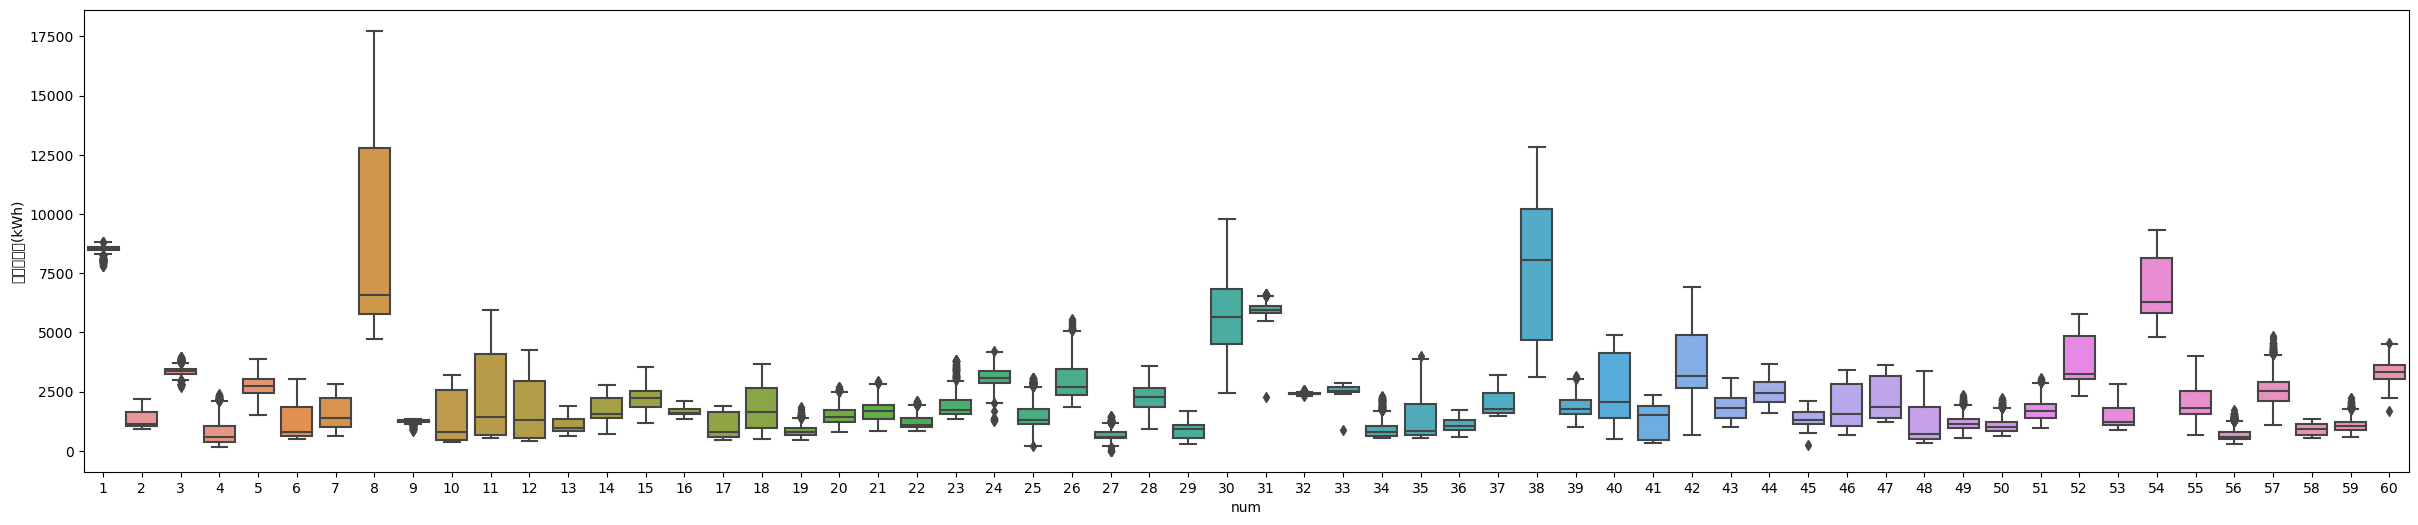

In [45]:
# 건물 별로 전력 사용량 패턴이 다름!!!
plt.figure(figsize=(30, 6))
sns.boxplot(data=train, x="num", y="전력사용량(kWh)")

In [51]:
train

num      date_time  전력사용량(kWh)  기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  \
0         1  2020-06-01 00    8179.056    17.6      2.5   92.0      0.8   
1         1  2020-06-01 01    8135.640    17.7      2.9   91.0      0.3   
2         1  2020-06-01 02    8107.128    17.5      3.2   91.0      0.0   
3         1  2020-06-01 03    8048.808    17.1      3.2   91.0      0.0   
4         1  2020-06-01 04    8043.624    17.0      3.3   92.0      0.0   
...     ...            ...         ...     ...      ...    ...      ...   
122395   60  2020-08-24 19    4114.368    27.8      2.3   68.0      0.0   
122396   60  2020-08-24 20    3975.696    27.3      1.2   71.0      0.0   
122397   60  2020-08-24 21    3572.208    27.3      1.8   71.0      0.0   
122398   60  2020-08-24 22    3299.184    27.1      1.8   74.0      0.0   
122399   60  2020-08-24 23    3204.576    27.1      2.6   75.0      0.0   

        일조(hr)  비전기냉방설비운영  태양광보유  
0          0.0        0.0    0.0  
1          0.0        0.0    0.0  
2          0.0        0.0    0.0  
3          0.0        0.0    0.0  
4          0.0        0.0    0.0  
...        ...        ...    ...  
122395     0.7        1.0    1.0  
122396     0.0        1.0    1.0  
122397     0.0        1.0    1.0  
122398     0.0        1.0    1.0  
122399     0.0        1.0    1.0  

[122400 rows x 10 columns]

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

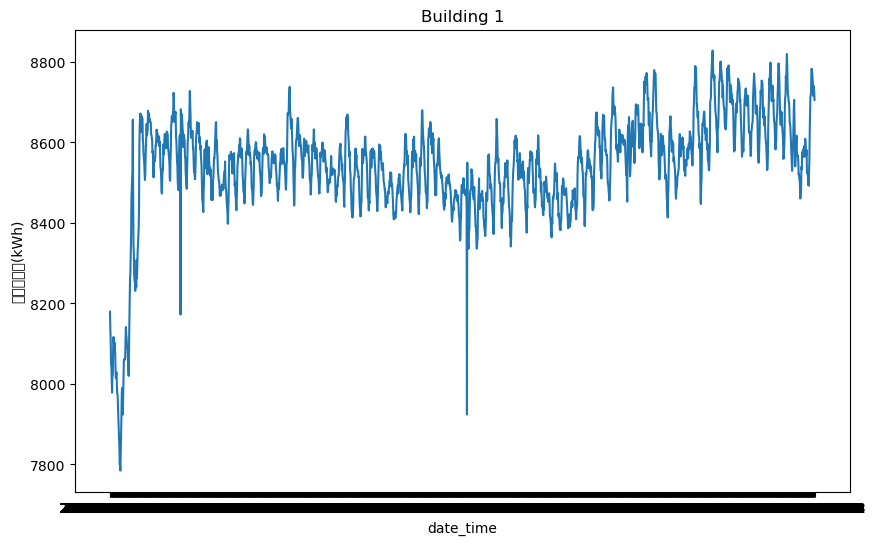

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

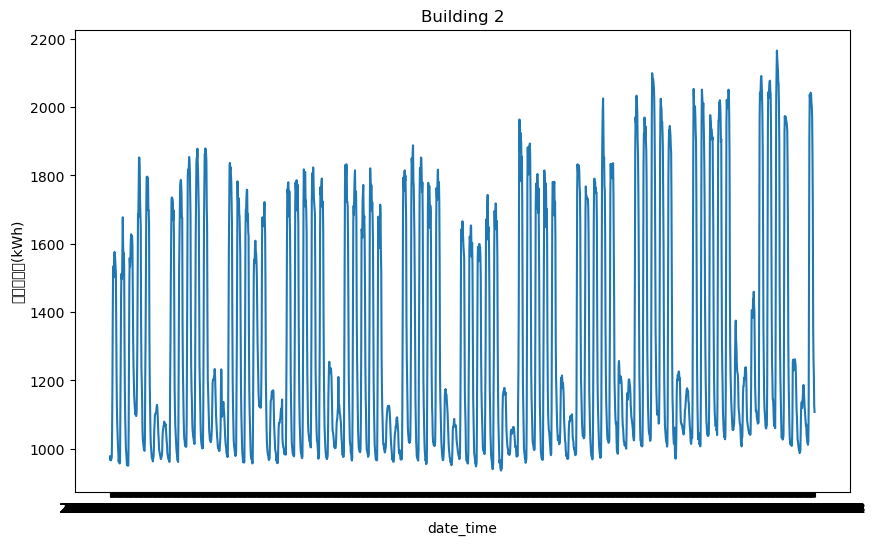

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

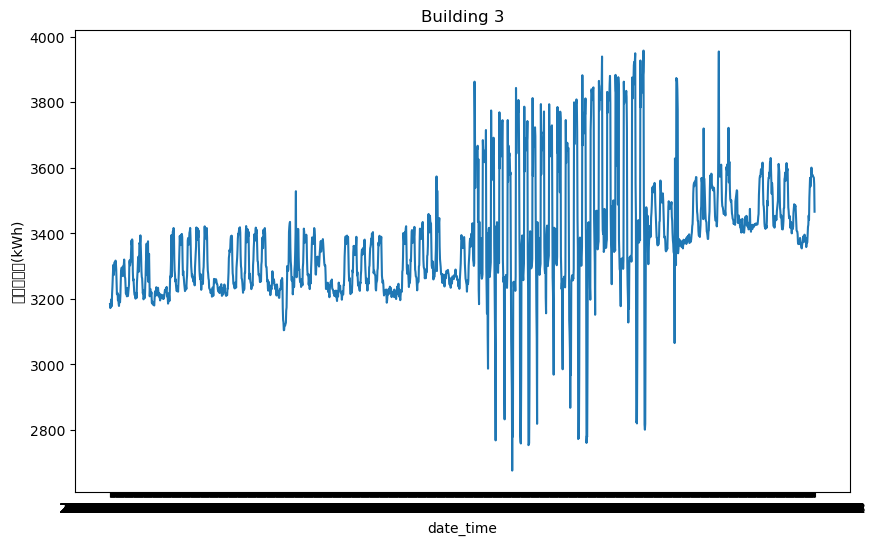

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

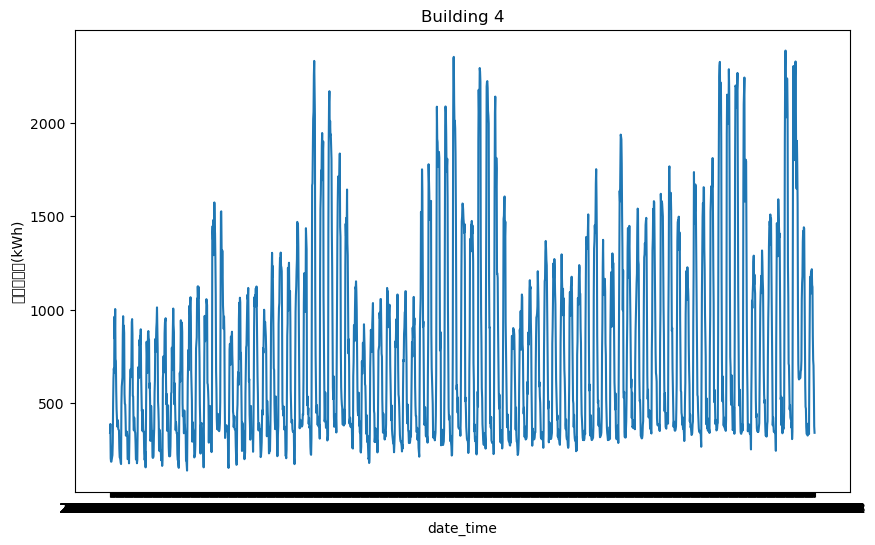

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

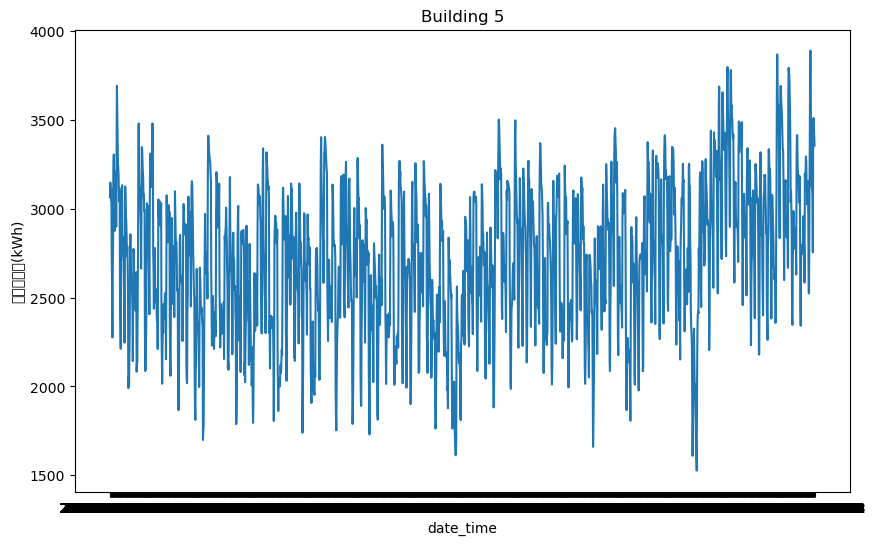

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

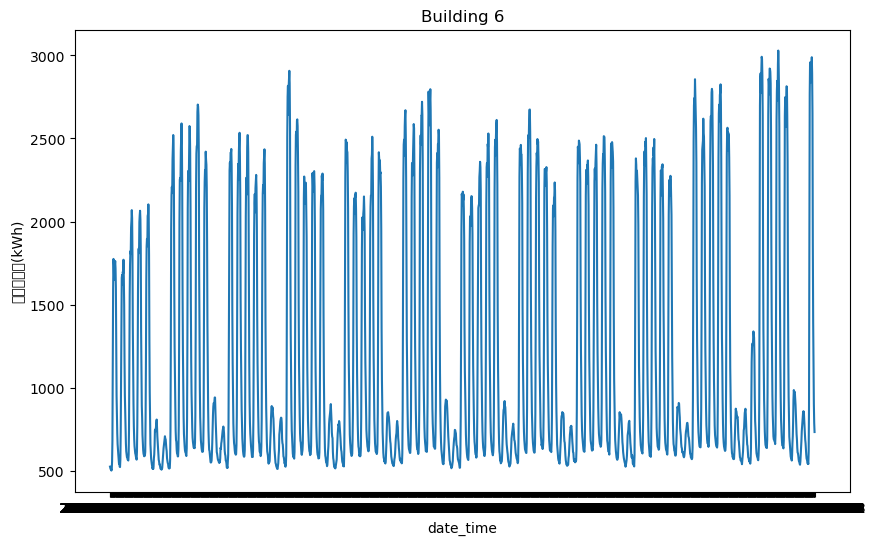

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

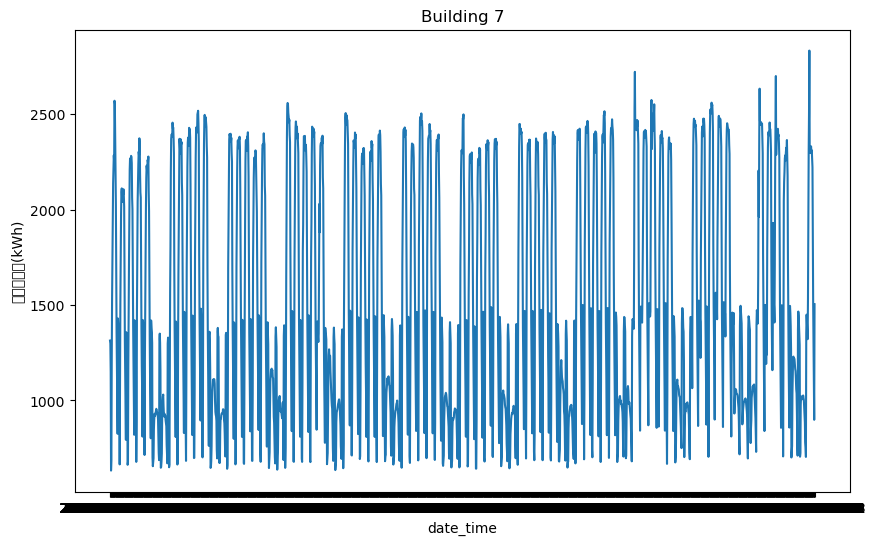

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

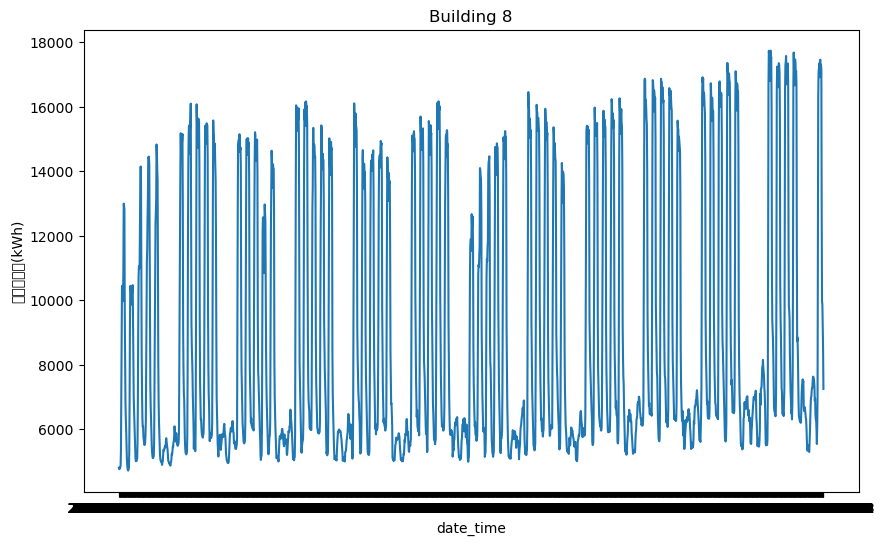

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

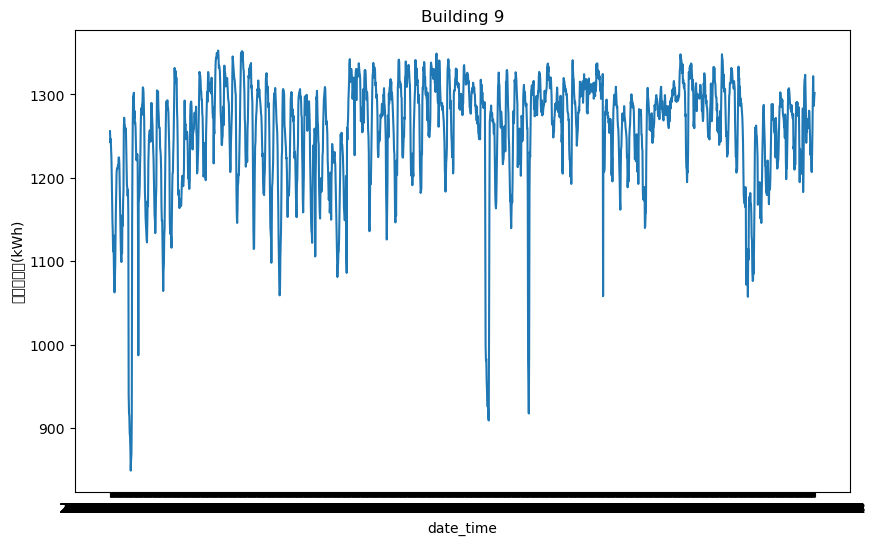

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

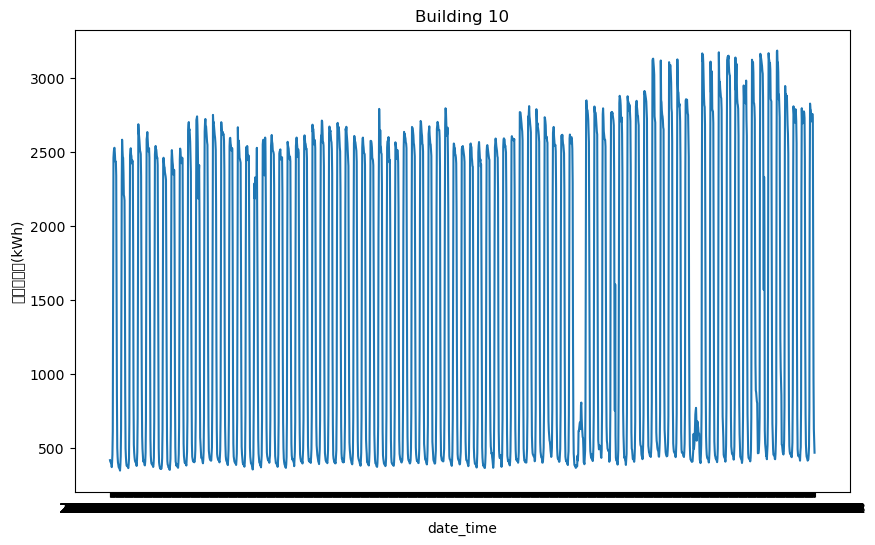

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

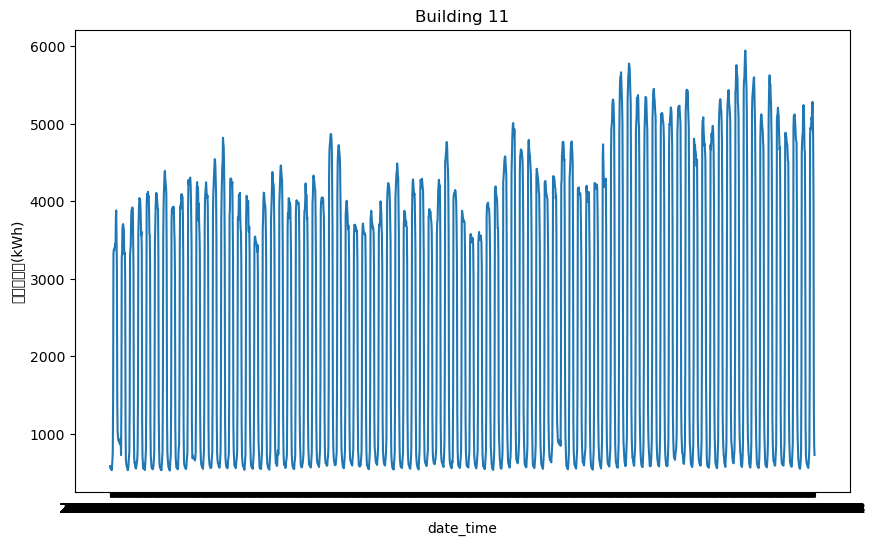

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

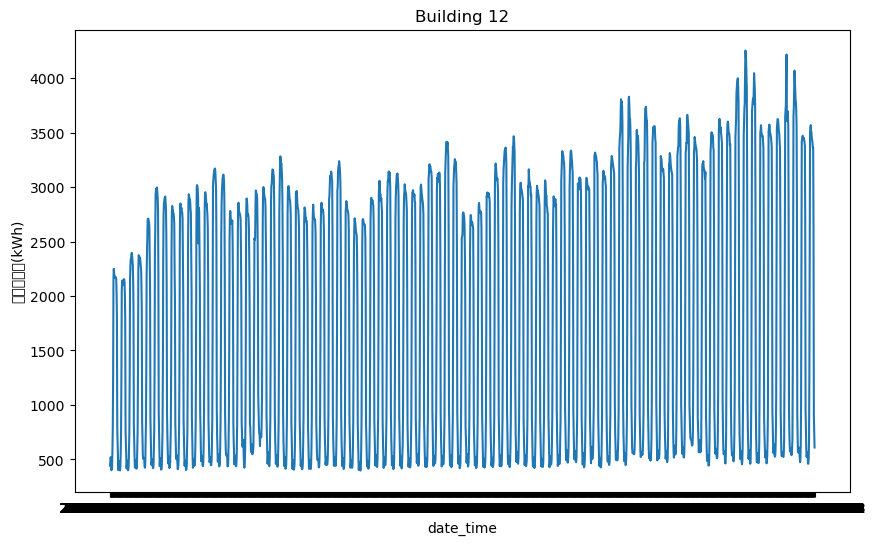

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

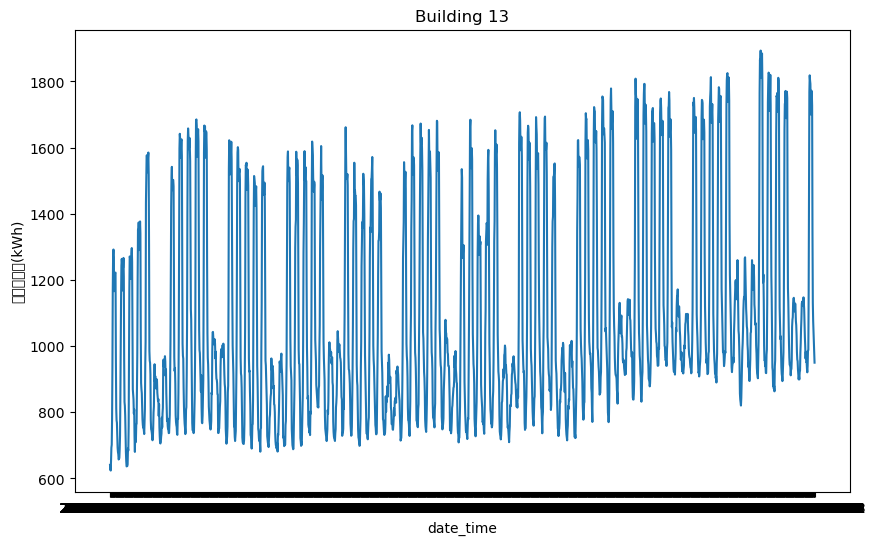

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

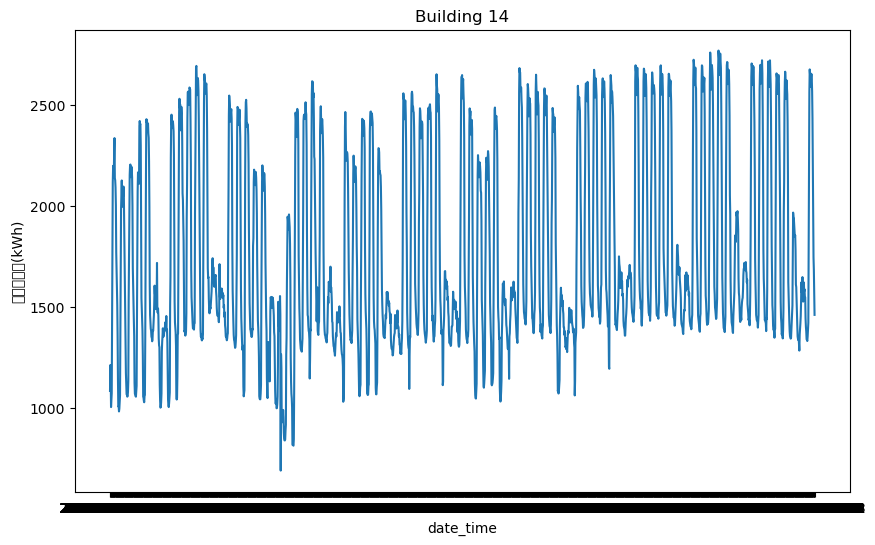

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

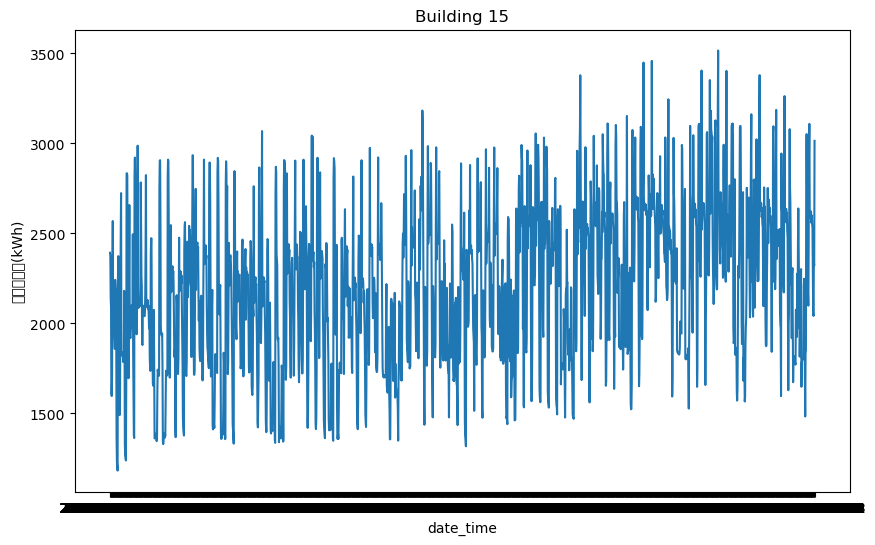

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

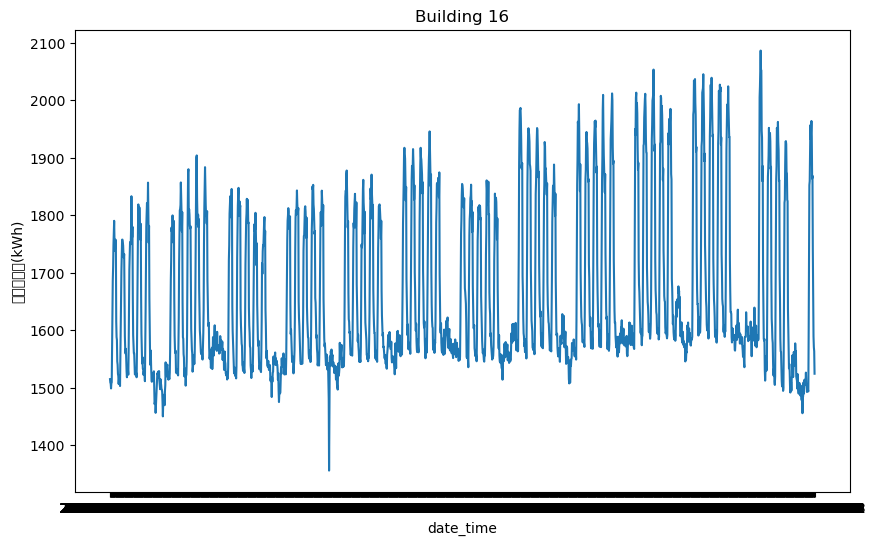

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

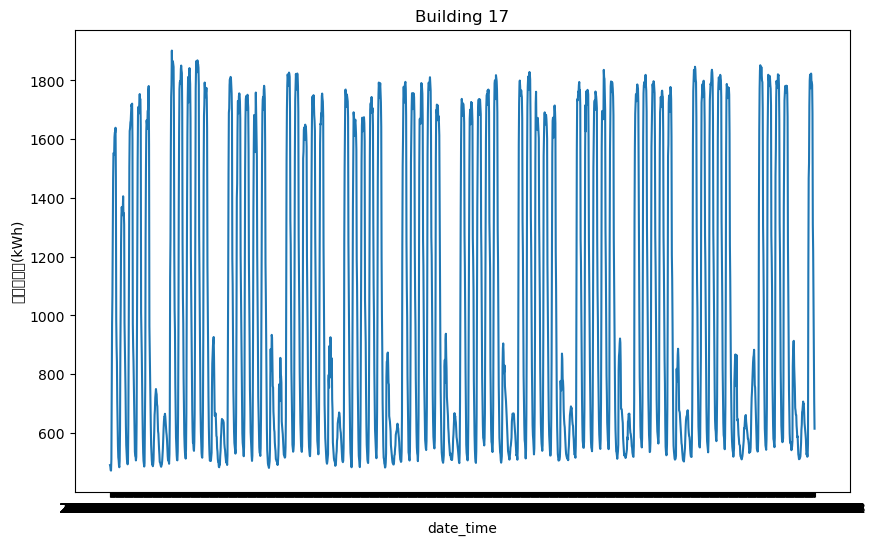

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

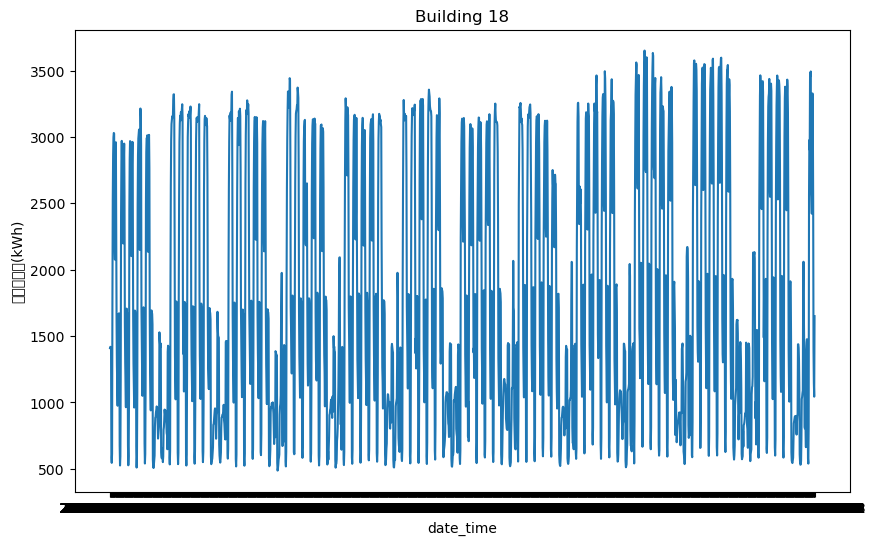

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

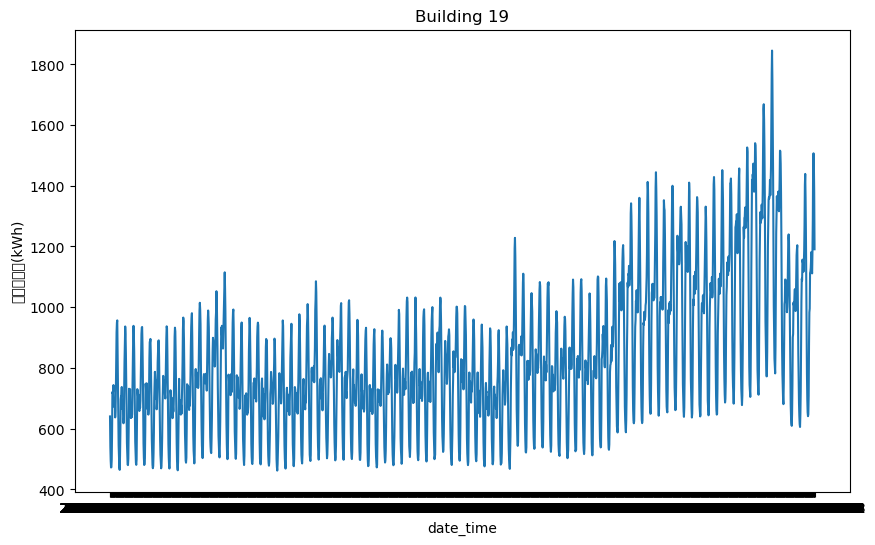

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

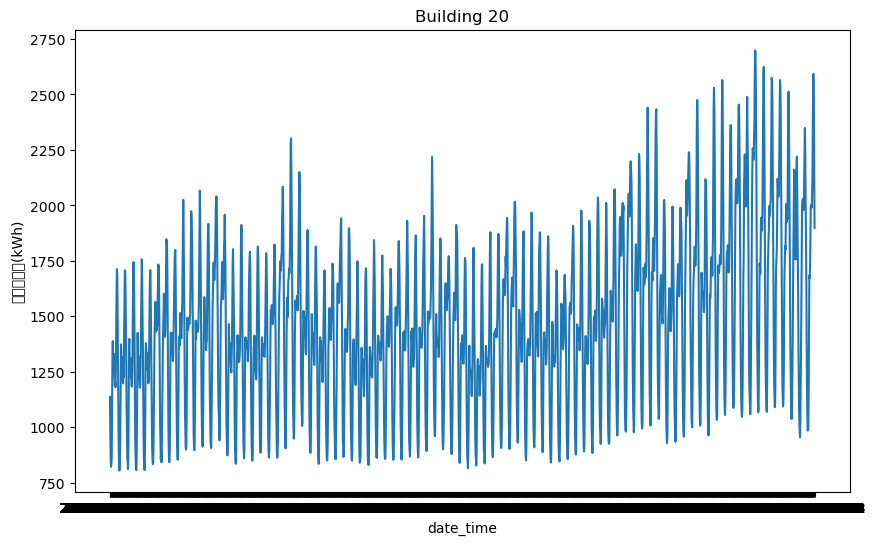

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

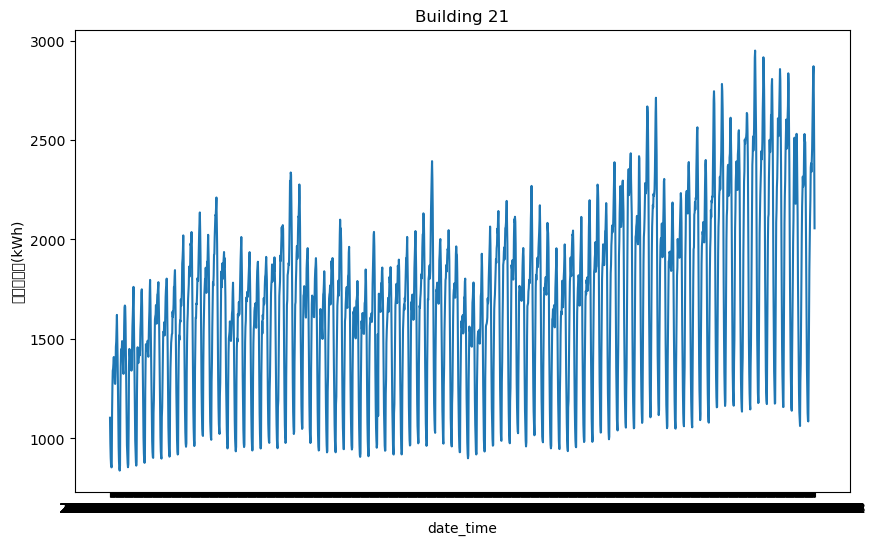

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

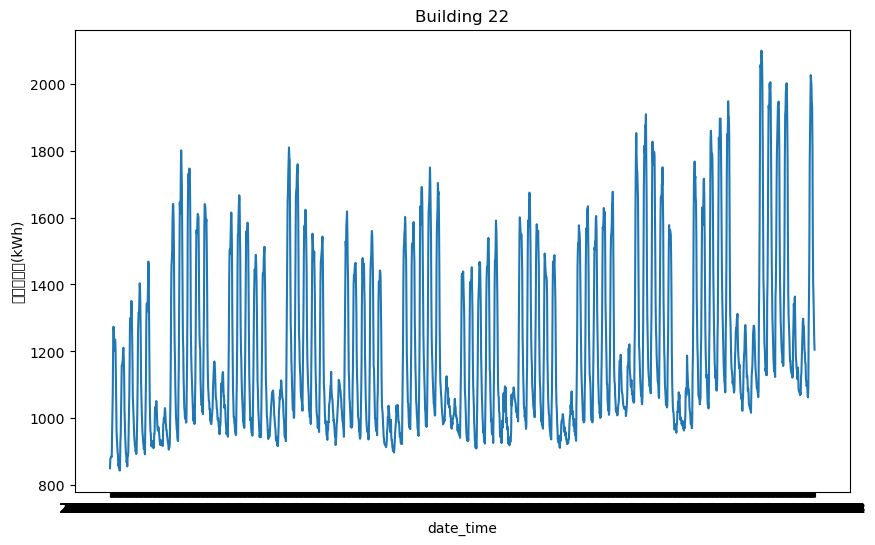

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

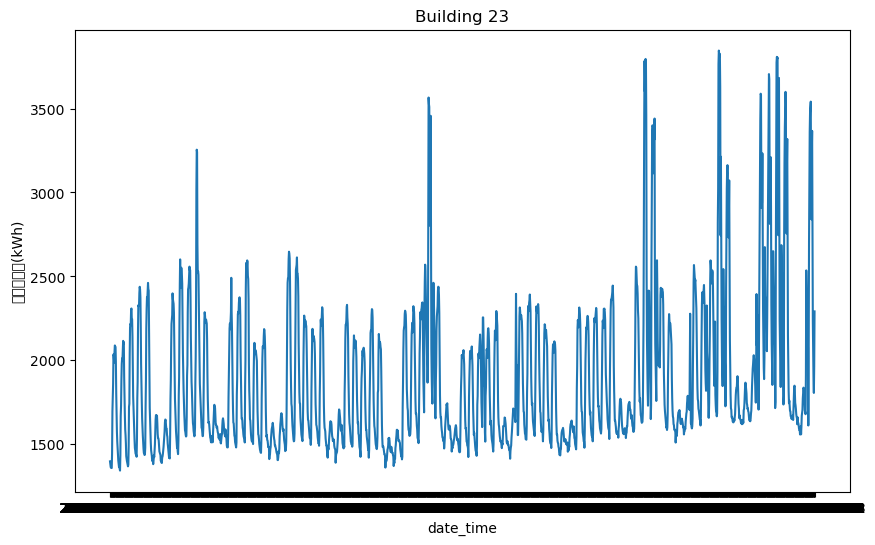

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

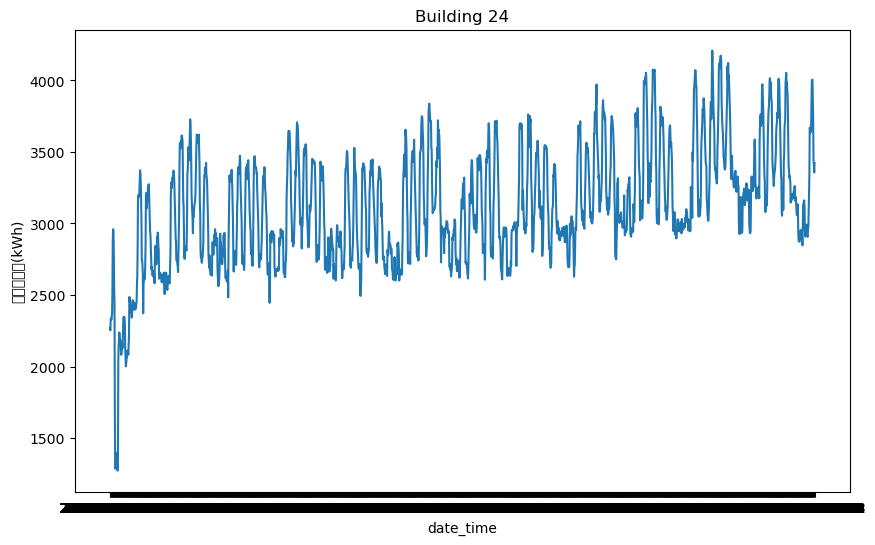

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

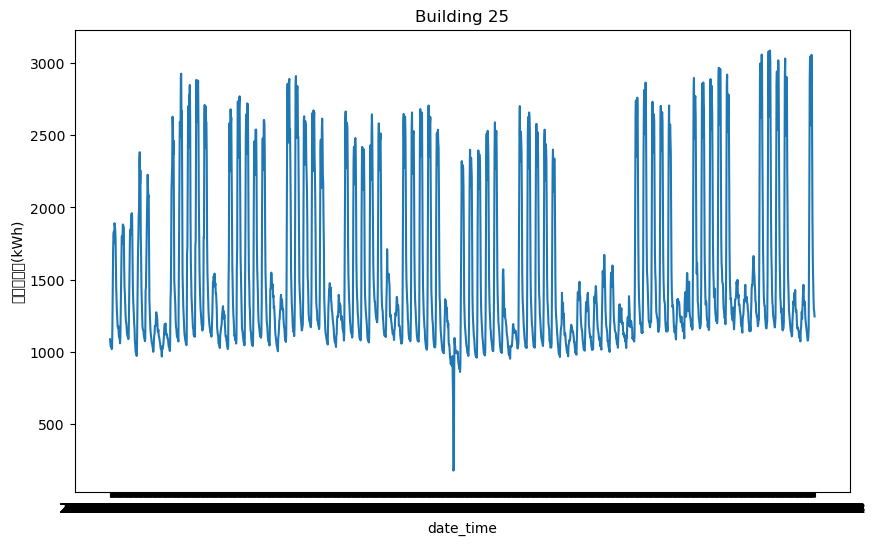

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

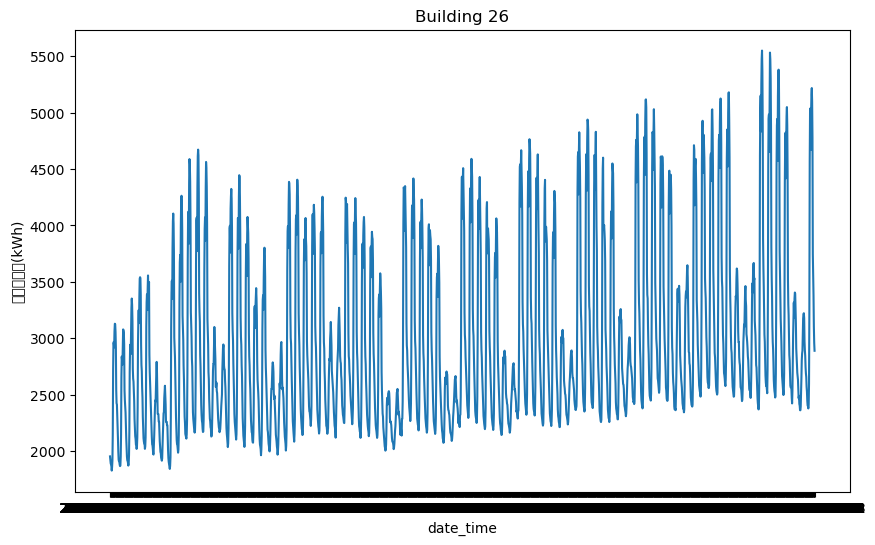

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

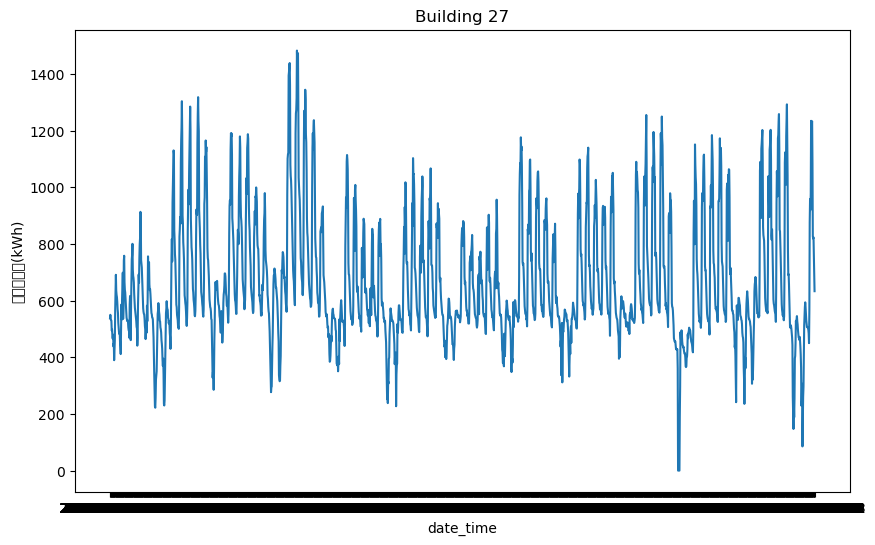

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

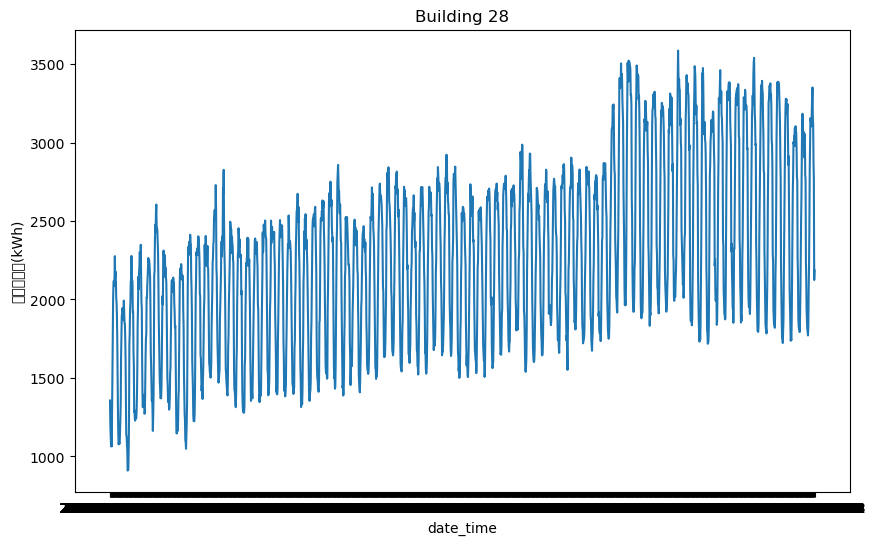

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

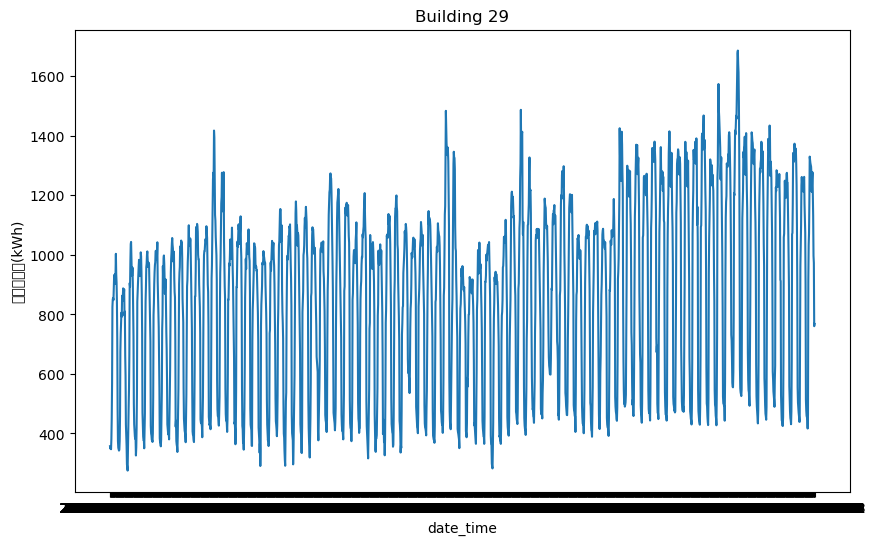

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

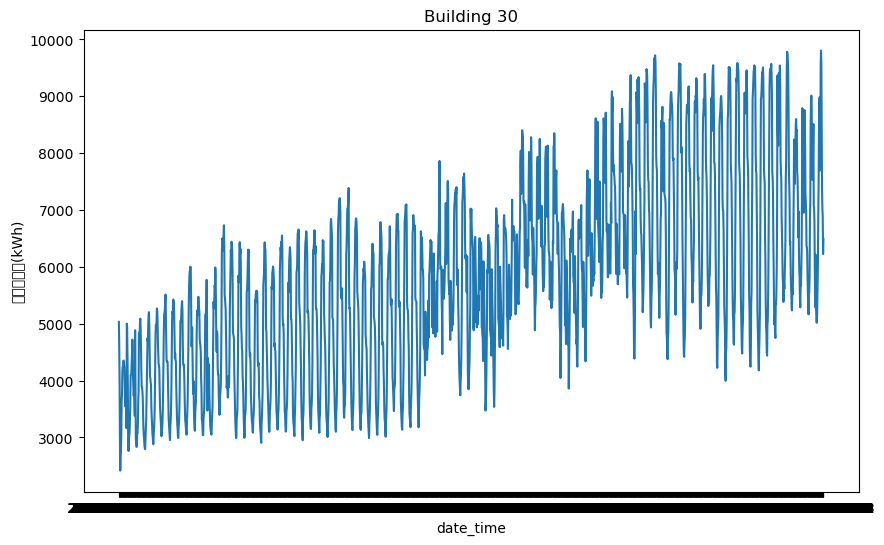

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

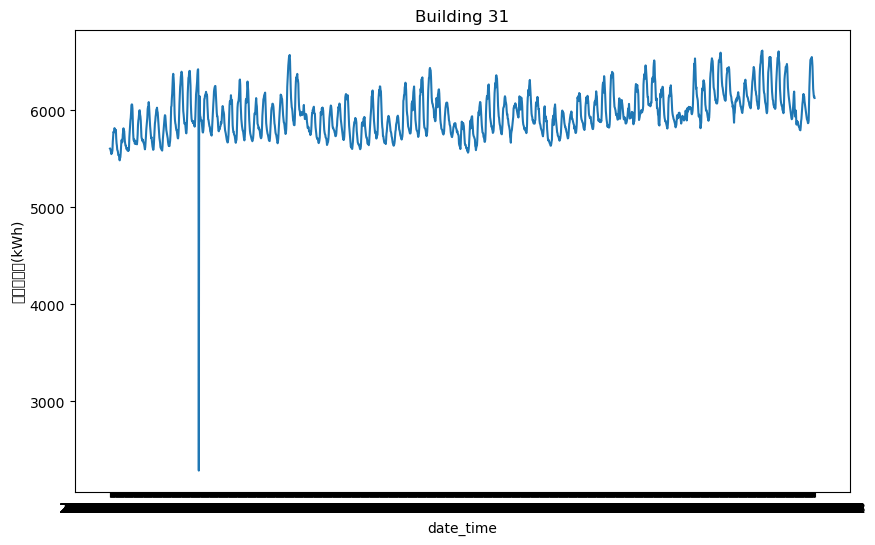

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

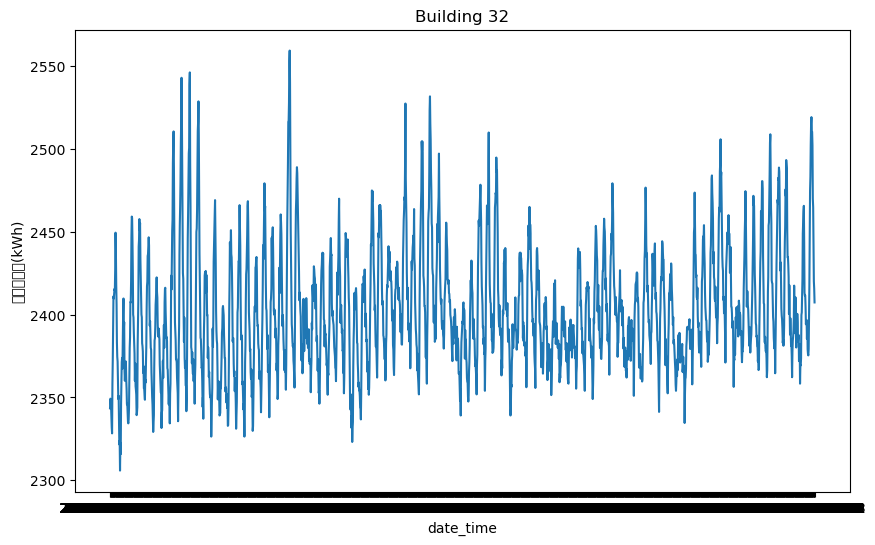

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

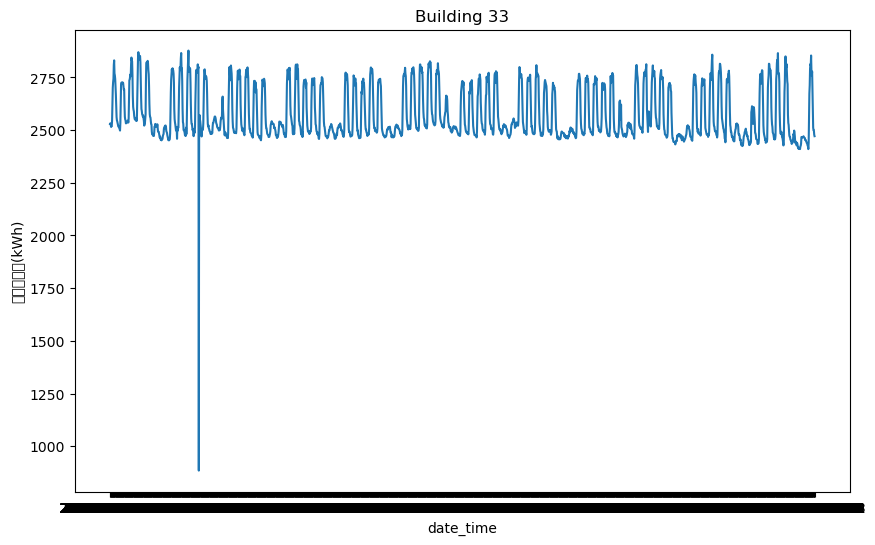

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

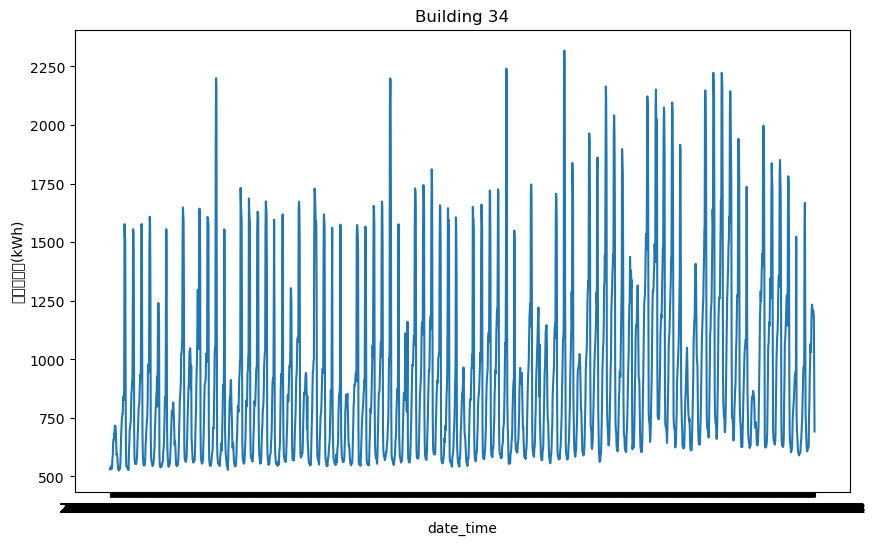

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

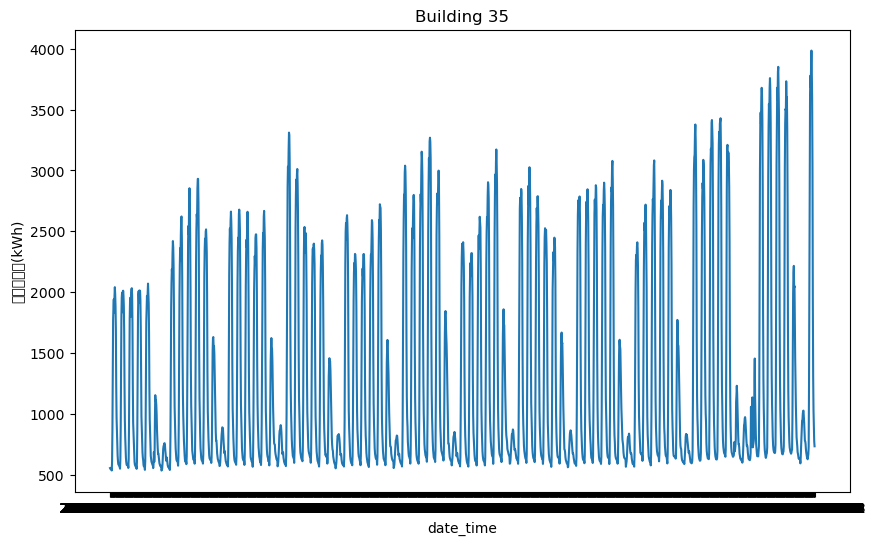

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

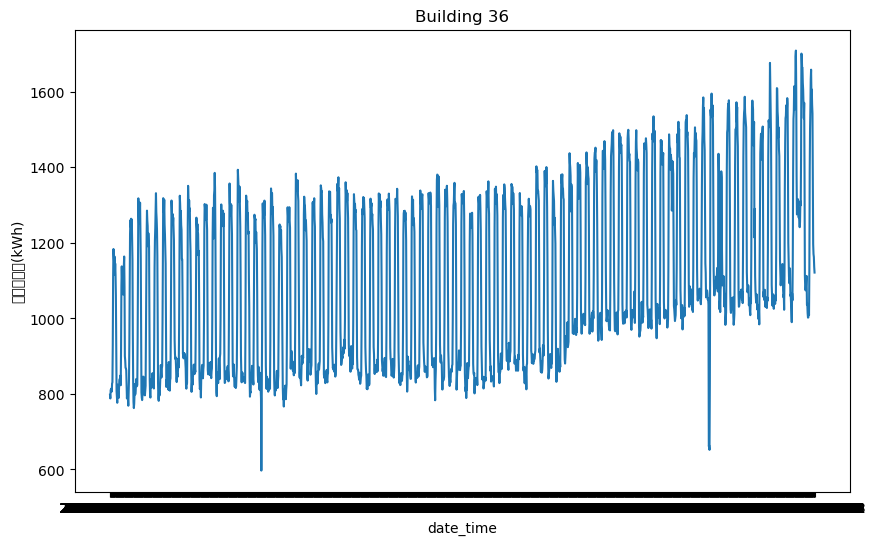

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

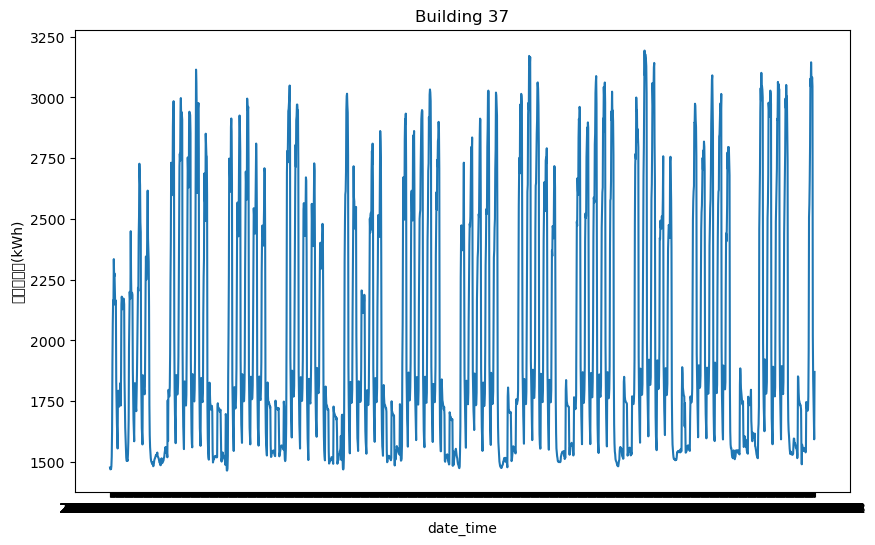

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

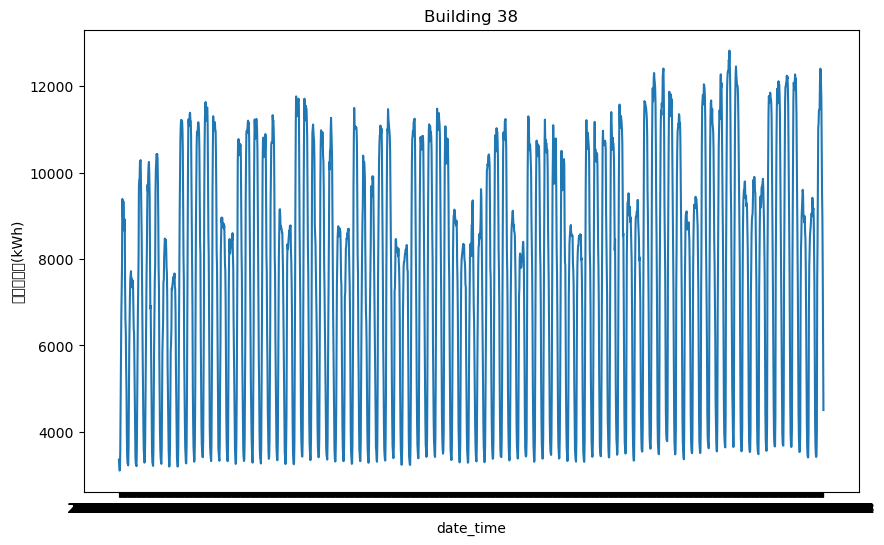

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

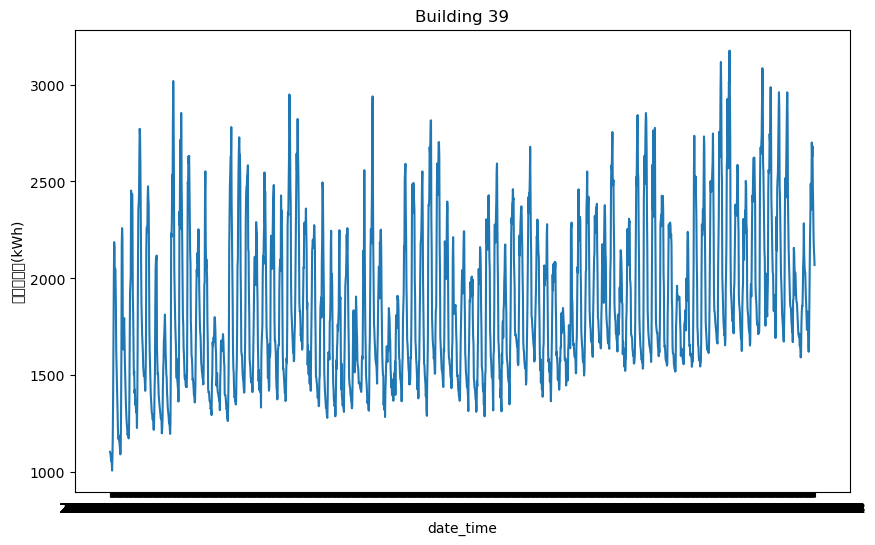

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

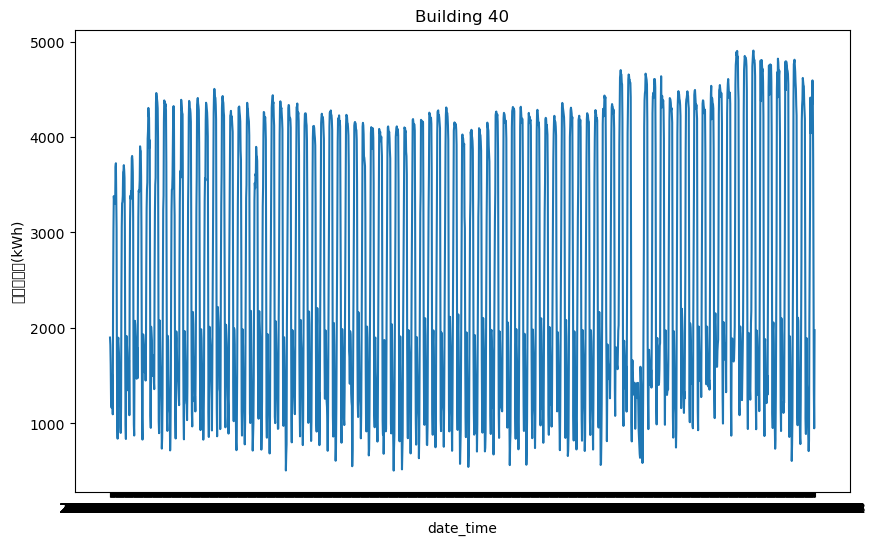

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

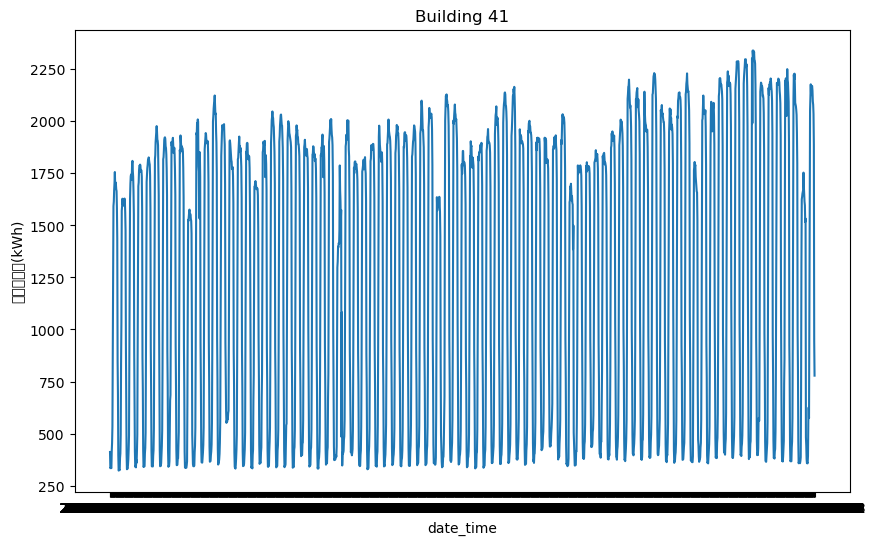

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

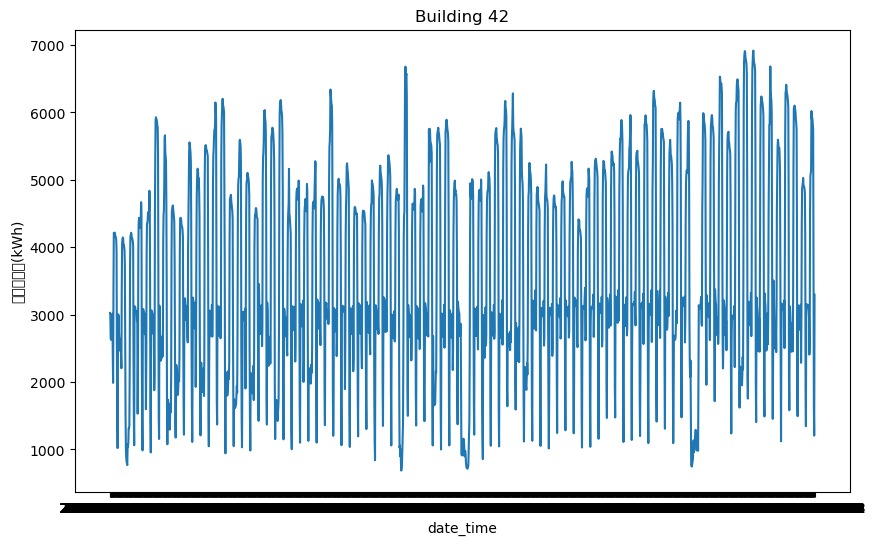

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

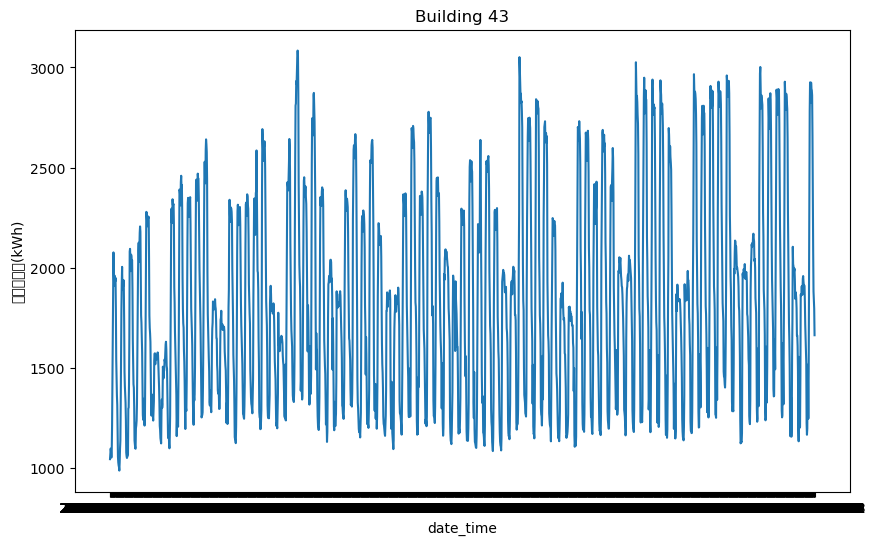

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

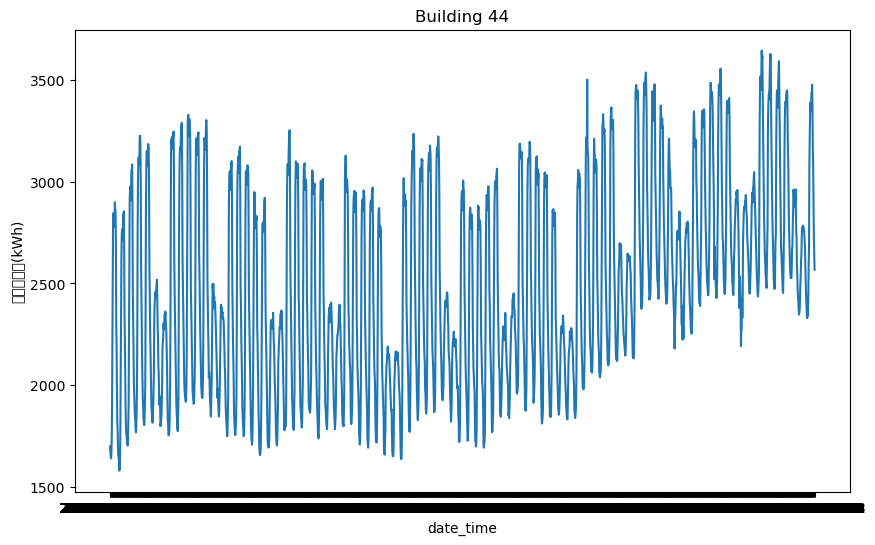

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

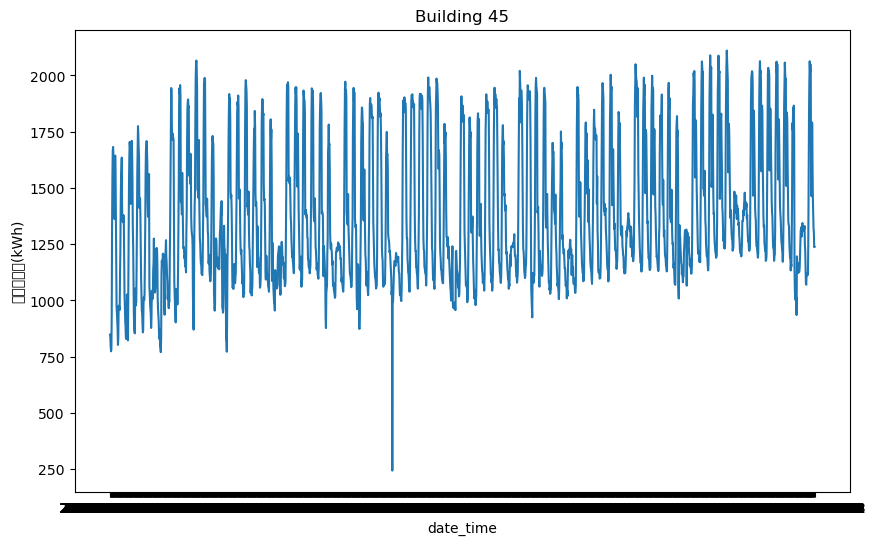

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

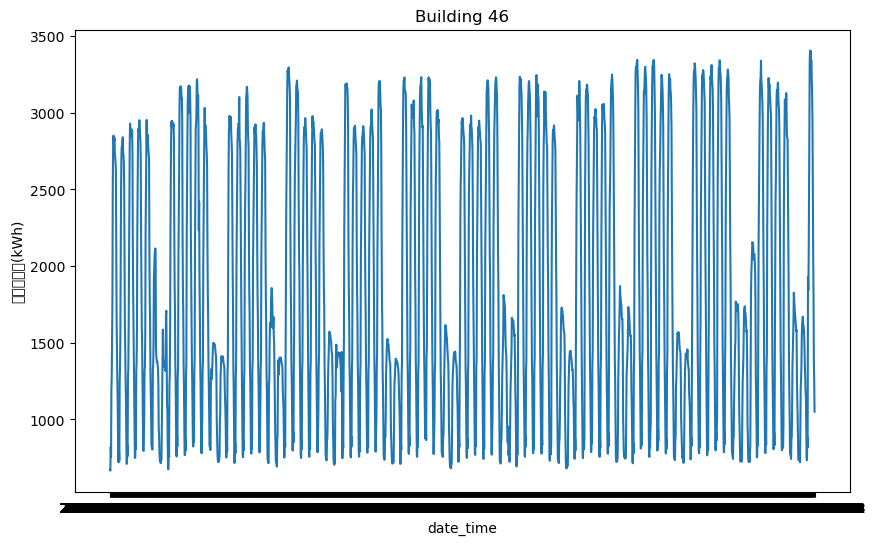

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

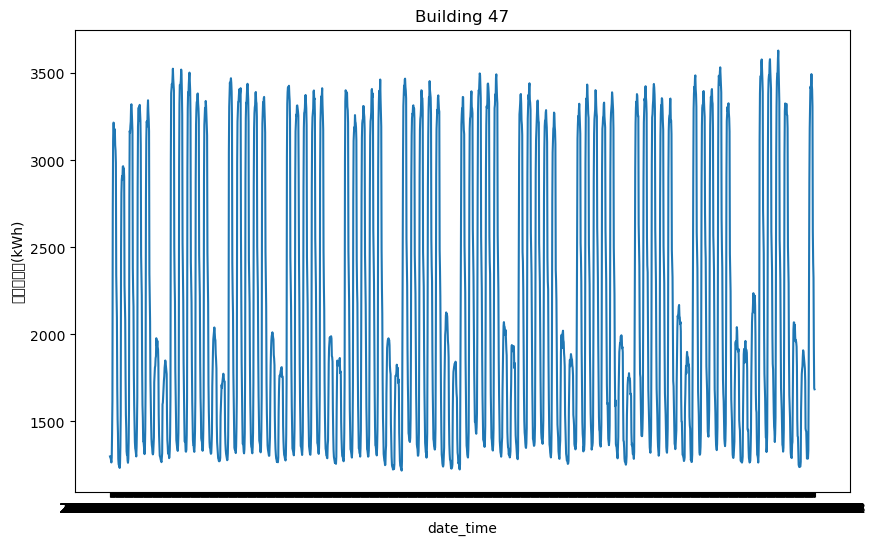

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

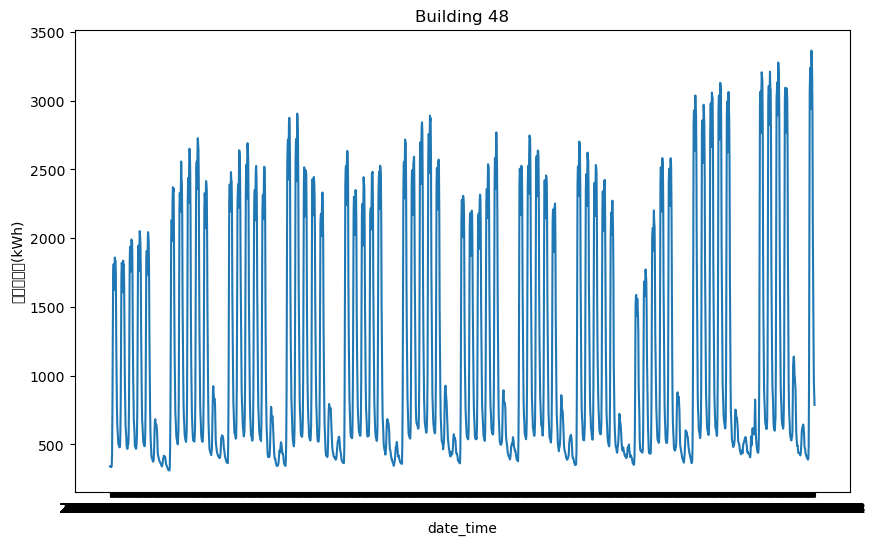

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

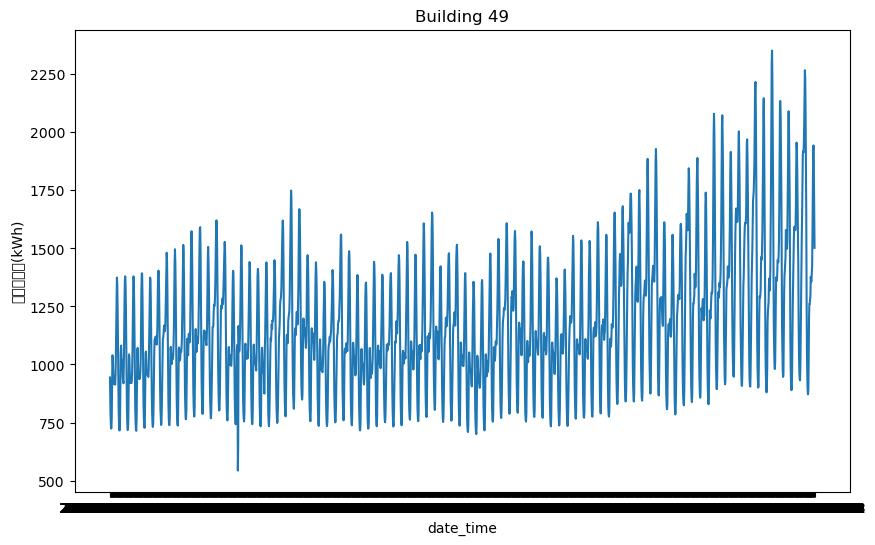

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

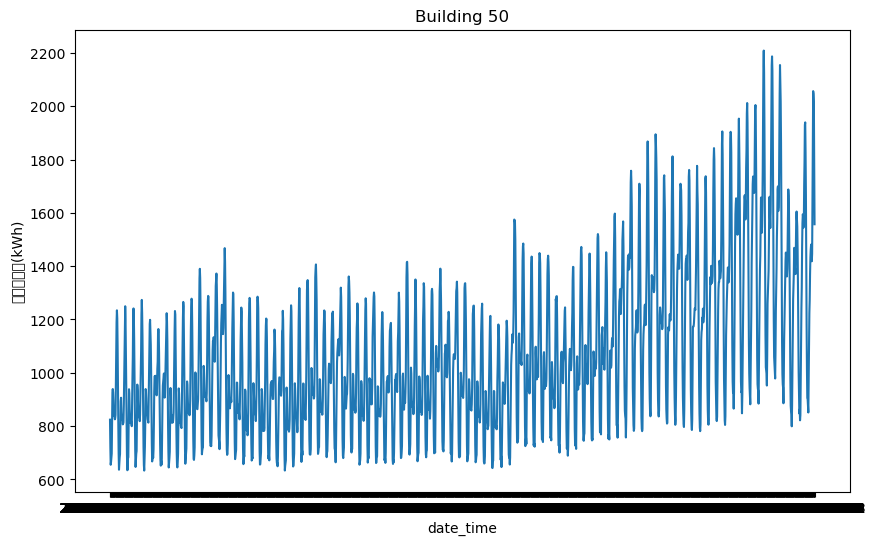

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

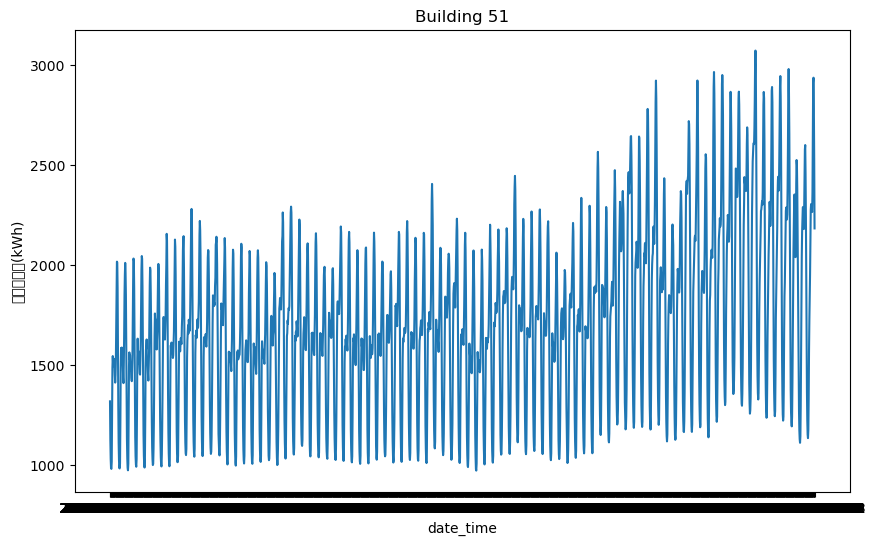

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

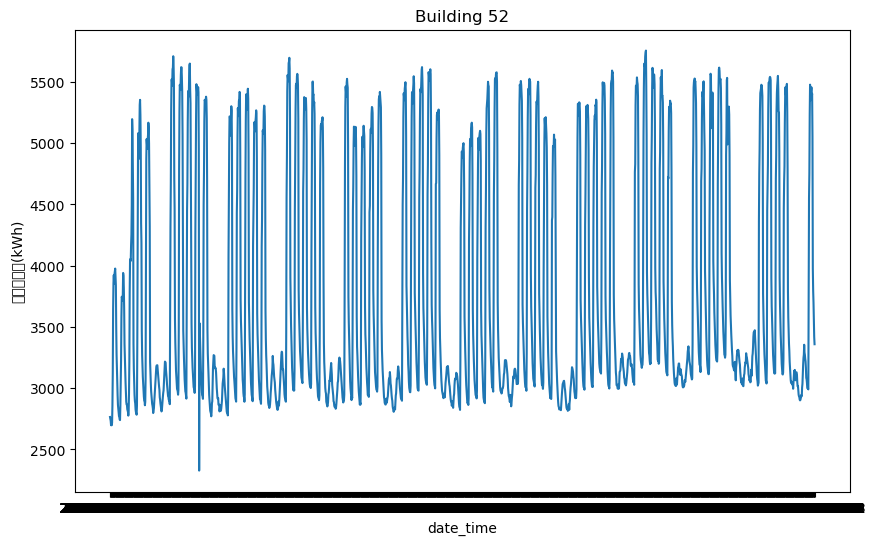

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

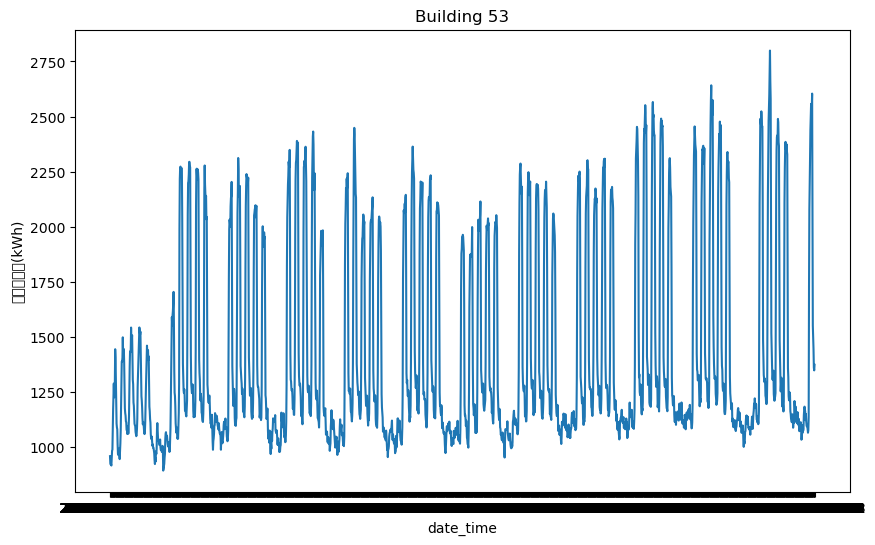

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

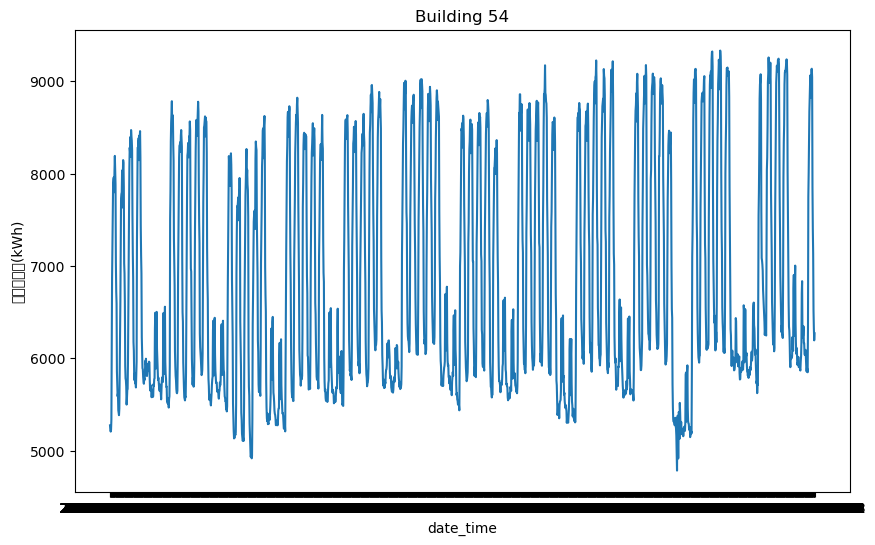

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

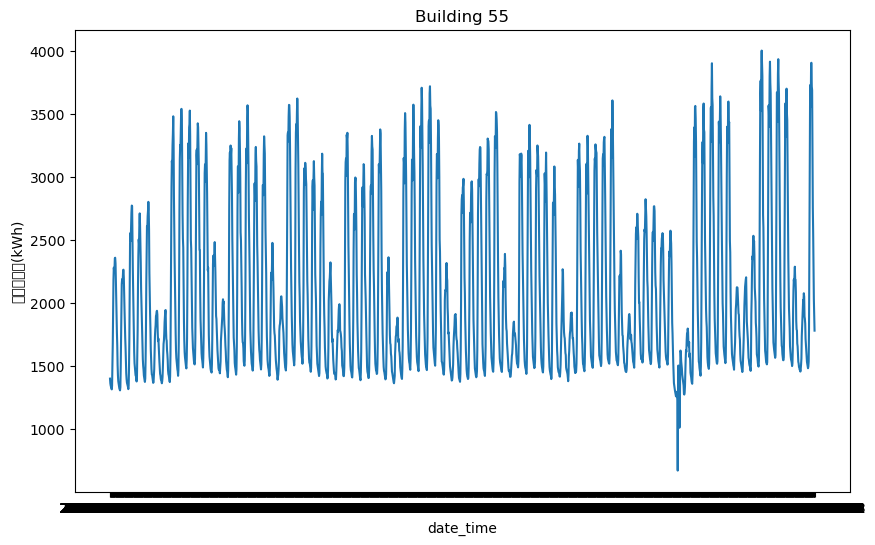

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

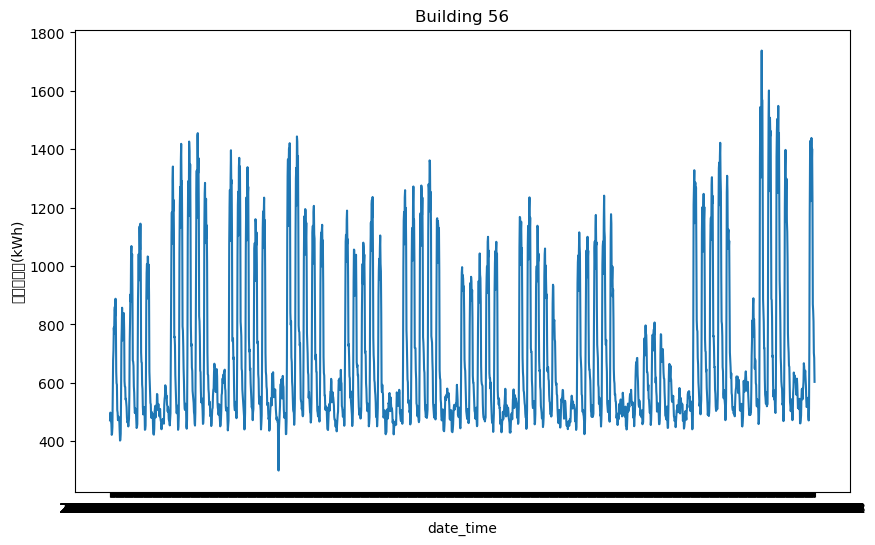

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

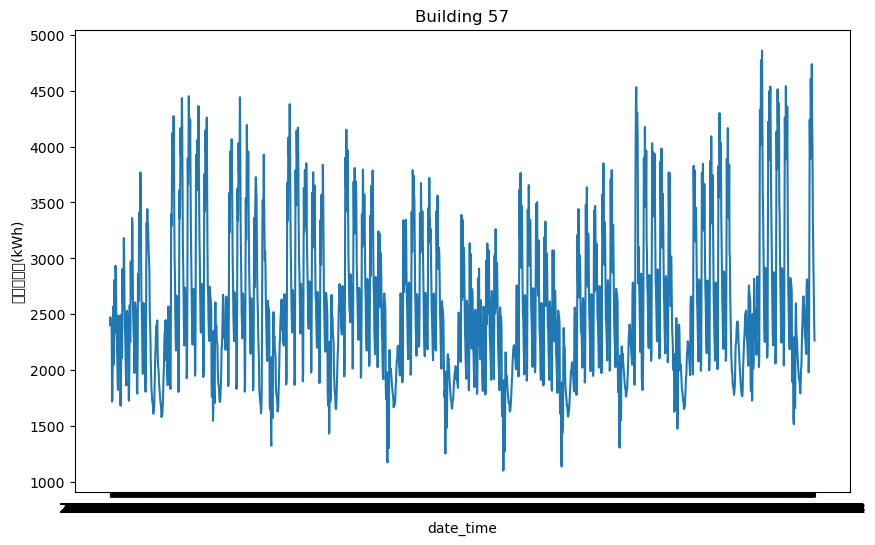

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

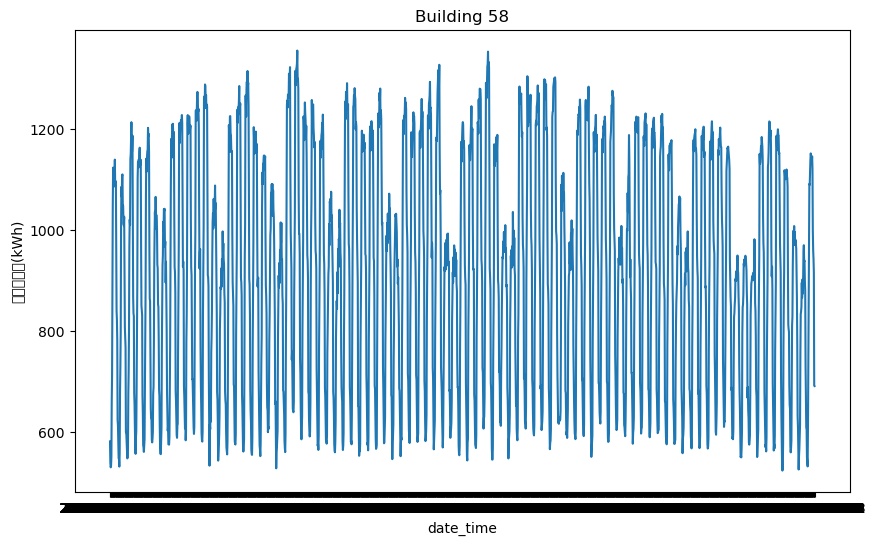

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

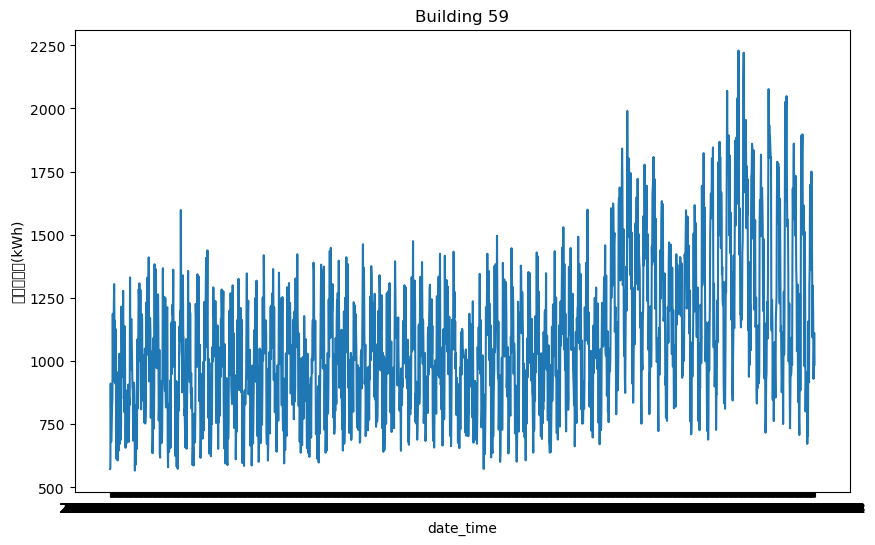

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2535420410.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sainthm/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/sain

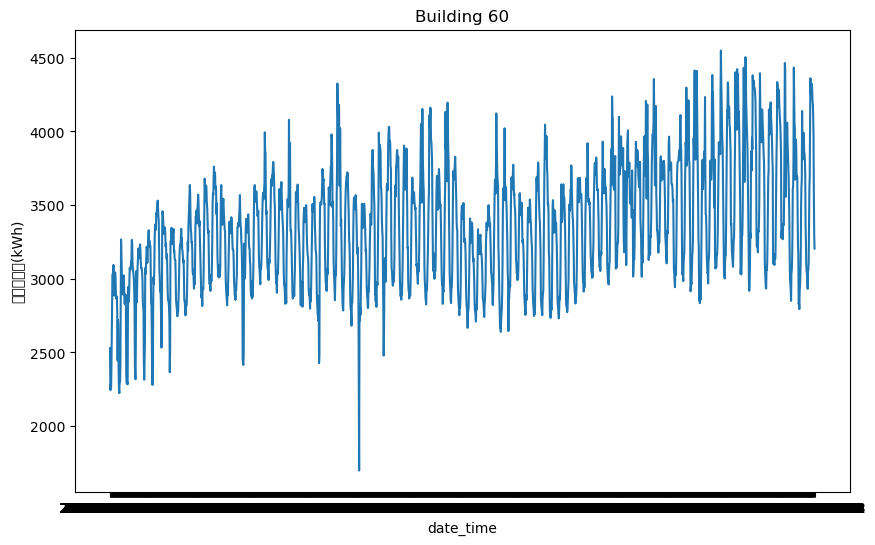

In [48]:
for n in range(1, 61):
    plt.figure(figsize=(10, 6))
    plt.title(f"Building {n}")
    sns.lineplot(data=train[train.num == n], x="date_time", y="전력사용량(kWh)", ci=None)
    plt.show()

In [55]:
train.date_tiem = pd.to_datetime(train.date_time)
test.date_tiem = pd.to_datetime(test.date_time)

In [56]:
train

num      date_time  전력사용량(kWh)  기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  \
0         1  2020-06-01 00    8179.056    17.6      2.5   92.0      0.8   
1         1  2020-06-01 01    8135.640    17.7      2.9   91.0      0.3   
2         1  2020-06-01 02    8107.128    17.5      3.2   91.0      0.0   
3         1  2020-06-01 03    8048.808    17.1      3.2   91.0      0.0   
4         1  2020-06-01 04    8043.624    17.0      3.3   92.0      0.0   
...     ...            ...         ...     ...      ...    ...      ...   
122395   60  2020-08-24 19    4114.368    27.8      2.3   68.0      0.0   
122396   60  2020-08-24 20    3975.696    27.3      1.2   71.0      0.0   
122397   60  2020-08-24 21    3572.208    27.3      1.8   71.0      0.0   
122398   60  2020-08-24 22    3299.184    27.1      1.8   74.0      0.0   
122399   60  2020-08-24 23    3204.576    27.1      2.6   75.0      0.0   

        일조(hr)  비전기냉방설비운영  태양광보유  
0          0.0        0.0    0.0  
1          0.0        0.0    0.0  
2          0.0        0.0    0.0  
3          0.0        0.0    0.0  
4          0.0        0.0    0.0  
...        ...        ...    ...  
122395     0.7        1.0    1.0  
122396     0.0        1.0    1.0  
122397     0.0        1.0    1.0  
122398     0.0        1.0    1.0  
122399     0.0        1.0    1.0  

[122400 rows x 10 columns]

In [57]:
train.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유'],
      dtype='object')

In [59]:
train.columns = ["num", "date_time", "target", "temperatur", "windspeed", "humidity",
                "precipitation", "insolation", "elec_cool", "solar"]

test.columns = ["num", "date_time", "temperatur", "windspeed", "humidity",
                "precipitation", "insolation", "elec_cool", "solar"]

In [60]:
train

num      date_time    target  temperatur  windspeed  humidity  \
0         1  2020-06-01 00  8179.056        17.6        2.5      92.0   
1         1  2020-06-01 01  8135.640        17.7        2.9      91.0   
2         1  2020-06-01 02  8107.128        17.5        3.2      91.0   
3         1  2020-06-01 03  8048.808        17.1        3.2      91.0   
4         1  2020-06-01 04  8043.624        17.0        3.3      92.0   
...     ...            ...       ...         ...        ...       ...   
122395   60  2020-08-24 19  4114.368        27.8        2.3      68.0   
122396   60  2020-08-24 20  3975.696        27.3        1.2      71.0   
122397   60  2020-08-24 21  3572.208        27.3        1.8      71.0   
122398   60  2020-08-24 22  3299.184        27.1        1.8      74.0   
122399   60  2020-08-24 23  3204.576        27.1        2.6      75.0   

        precipitation  insolation  elec_cool  solar  
0                 0.8         0.0        0.0    0.0  
1                 0.3         0.0        0.0    0.0  
2                 0.0         0.0        0.0    0.0  
3                 0.0         0.0        0.0    0.0  
4                 0.0         0.0        0.0    0.0  
...               ...         ...        ...    ...  
122395            0.0         0.7        1.0    1.0  
122396            0.0         0.0        1.0    1.0  
122397            0.0         0.0        1.0    1.0  
122398            0.0         0.0        1.0    1.0  
122399            0.0         0.0        1.0    1.0  

[122400 rows x 10 columns]

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2320070560.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="target", ci=None)


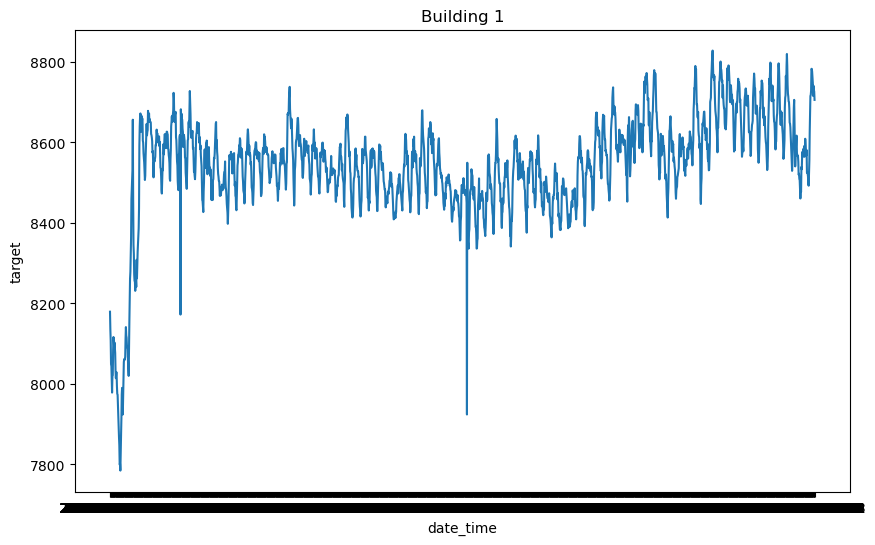

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2320070560.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="target", ci=None)


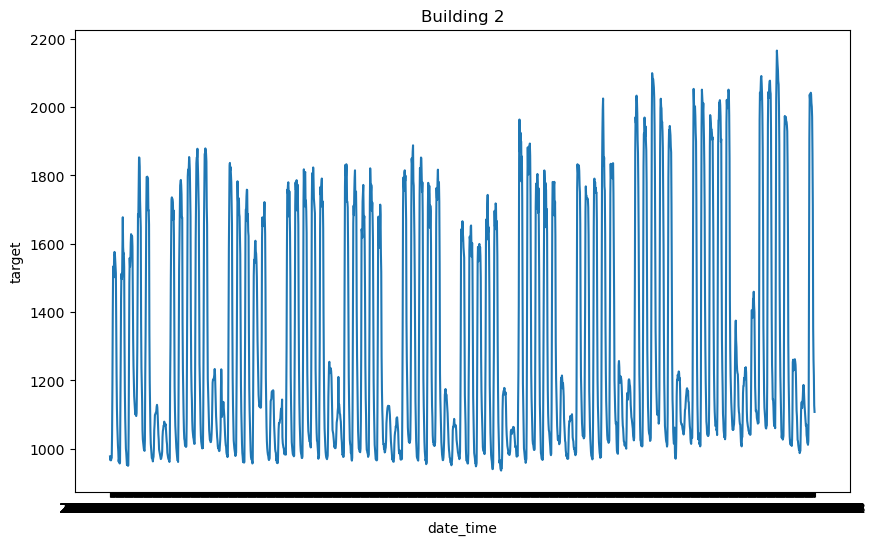

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2320070560.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="target", ci=None)


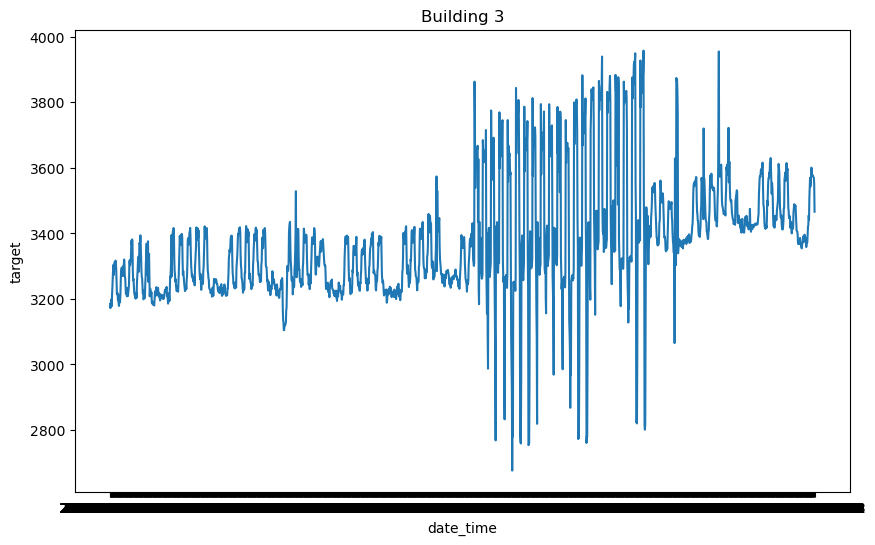

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2320070560.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="target", ci=None)


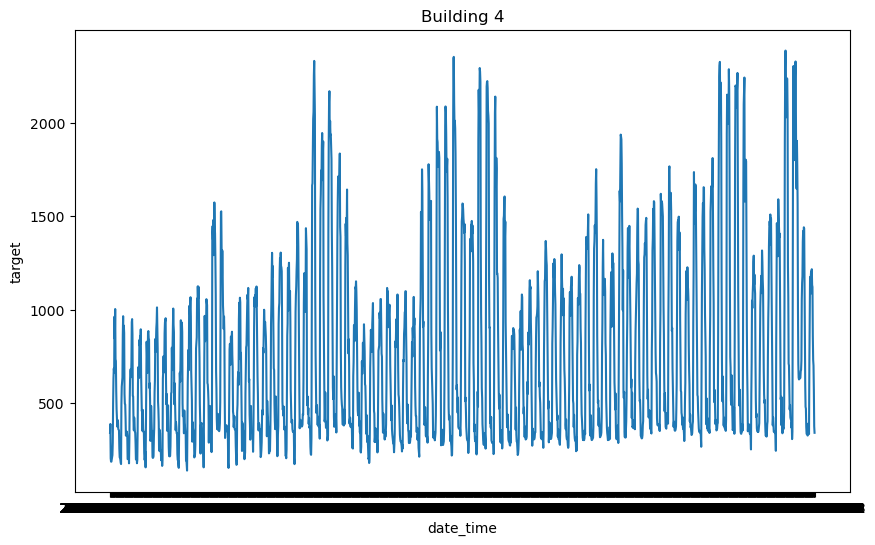

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2320070560.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="target", ci=None)


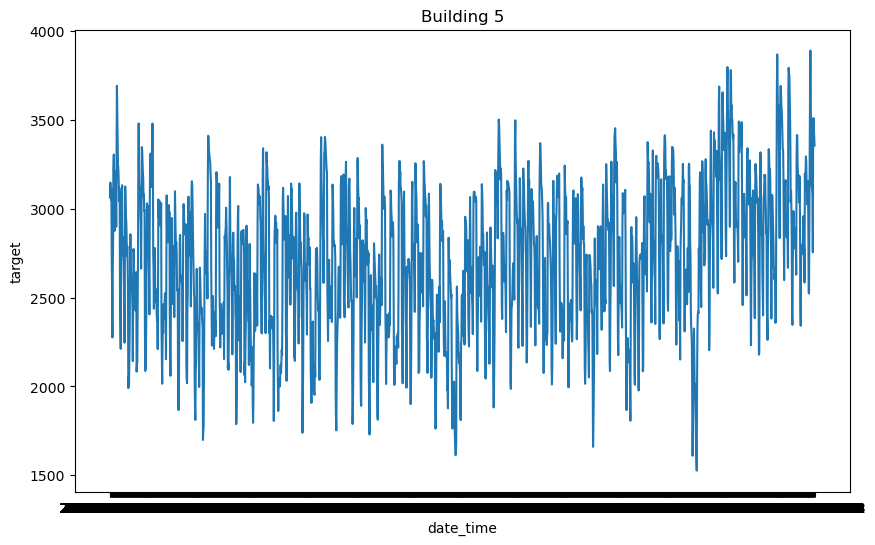

/var/folders/4h/b2cqm88s3cl_l0lpwl10b69r0000gn/T/ipykernel_26499/2320070560.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train[train.num == n], x="date_time", y="target", ci=None)


In [ ]:
for n in range(1, 61):
    plt.figure(figsize=(10, 6))
    plt.title(f"Building {n}")
    sns.lineplot(data=train[train.num == n], x="date_time", y="target", ci=None)
    plt.show()